https://github.com/jakevdp/PythonDataScienceHandbook/tree/master/notebooks

**<h1> Pandas 훈련 </h1>**


* Pandas는 NumPy를 기반으로 만들어진 새로운 패키지로서 DataFrame 이라는 효율적인 자료구조를 제공한다
  - DataFrame : 행과 열 레이블이 부착된 다차원 배열. 여러 가지 타입의 데이터를 가질 수 있으며 데이터 누락도 허용된다

In [ ]:
import pandas as pd
import numpy as np

# Pandas 설치 및 사용

In [ ]:
import pandas as pd
pd.__version__    #버전 확인

pd?
#내장 문서 열람

# ================================

# Pandas Series 객체

* Pandas Series : 인덱싱된 데이터의 1차원 배열

  - NumPy 배열과 근본적인 차이 : 인덱스의 존재 여부

In [ ]:
"""Pandas Series 객체"""
import numpy as np
import pandas as pd

data = pd.Series([0.25, 0.5, 0.75, 1.0])
print(data)
print(" ")

print(data.values)    #values 와 index 속성으로 접근 가능
print(data.index)
print(" ")

print(data[1])
print(data[1:3])      #인덱스로 접근 가능

0    0.25
1    0.50
2    0.75
3    1.00
dtype: float64
 
[0.25 0.5  0.75 1.  ]
RangeIndex(start=0, stop=4, step=1)
 
0.5
1    0.50
2    0.75
dtype: float64


In [ ]:
##  Series : 일반화된 NumPy 배열
data = pd.Series([0.25, 0.5, 0.75, 1.0],
                 index = ["a", "b", "c", "d"])    #인덱스 매개변수로 인덱스 직접 지정 가능
print(data)
print(data["b"])    #지정한 인덱스를 통해 데이터 접근 가능
print(" ")

data = pd.Series([0.25, 0.5, 0.75, 1.0],
                 index = [2, 5, 3, 7])            #인접하지 않거나 연속적이지 않은 인덱스 사용 가능
print(data)

a    0.25
b    0.50
c    0.75
d    1.00
dtype: float64
0.5
 
2    0.25
5    0.50
3    0.75
7    1.00
dtype: float64


In [ ]:
##  Series : 특수한 딕셔너리
population_dict = {"California" : 38332521,
                   "Texas" : 26448193,
                   "New York" : 19651127,
                   "Florida" : 19552860,
                   "Illinois" : 12882135}
population = pd.Series(population_dict)
print(population)
print(" ")

print(population["California"])
print(" ")

print(population["California":"New York"])    #딕셔너리와 달리 Series는 슬라이싱 같이 배열 스타일의 연산도 지원

California    38332521
Texas         26448193
New York      19651127
Florida       19552860
Illinois      12882135
dtype: int64
 
38332521
 
California    38332521
Texas         26448193
New York      19651127
dtype: int64


# Pandas DataFrame 객체
* Series 객체의 연속으로 볼 수 있다 (2차원 배열을 1차원 열의 연속으로 본다)

In [ ]:
"""Pandas DataFrame 객체"""
##  DataFrame : 일반화된 NumPy 배열
area_dict = {"California" : 423967, "Texas" : 695662, "New York" : 141297,
             "Florida" : 170312, "Illinois" : 149995}
area = pd.Series(area_dict)
print(area)
print(" ")

states = pd.DataFrame({"population" : population, "area" : area})
print(states)
print(" ")

print(states.index)   #인덱스 레이블에 접근할 수 있는 index 속성
print(states.columns) #열 레이블을 가지고 있는 columns 속성

California    423967
Texas         695662
New York      141297
Florida       170312
Illinois      149995
dtype: int64
 
            population    area
California    38332521  423967
Texas         26448193  695662
New York      19651127  141297
Florida       19552860  170312
Illinois      12882135  149995
 
Index(['California', 'Texas', 'New York', 'Florida', 'Illinois'], dtype='object')
Index(['population', 'area'], dtype='object')


In [ ]:
##  DataFrame : 특수한 딕셔너리
print(states["area"])   #열 이름을 열 데이터로 이뤄진 Series에 매핑한다

California    423967
Texas         695662
New York      141297
Florida       170312
Illinois      149995
Name: area, dtype: int64


In [ ]:
## DataFrame 객체 구성하기

### 단일 Series 객체에서 구성하기 : 열 하나짜리 DataFrame은 단일 Series로부터 구성할 수 있다
population_df = pd.DataFrame(population, columns = ["Population"])
print(population_df)
print(" ")

### 딕셔너리의 리스트에서 구성하기
data = [{"a":i, "b":2*i} for i in range(3)]
data_df = pd.DataFrame(data)
print(data_df)
print(" ")

print(pd.DataFrame([{"a":1, "b":2}, {"b":3, "c":4}])) #일부 키가 누락되더라도 Pandas는 누락된 자리를 NaN 값으로 채운다
                                                      #NaN : 숫자가 아님을 의미하는 not a number

### Series 객체의 딕셔너리에서 구성하기
states = pd.DataFrame({"population" : population, "area" : area})
print(states)
print(" ")

### 2차원 NumPy 배열에서 구성하기
df1 = pd.DataFrame(np.random.rand(3,2),
                   columns = ["Foo", "Bar"],
                   index = ["a", "b", "c"])
print(df1)
print(" ")

###NumPy의 구조화된 배열에서 구성하기
A = np.zeros(3, dtype = [("A", "i8") , ("B", "f8")])
dfA = pd.DataFrame(A)
print(dfA)

            Population
California    38332521
Texas         26448193
New York      19651127
Florida       19552860
Illinois      12882135
 
   a  b
0  0  0
1  1  2
2  2  4
 
     a  b    c
0  1.0  2  NaN
1  NaN  3  4.0
            population    area
California    38332521  423967
Texas         26448193  695662
New York      19651127  141297
Florida       19552860  170312
Illinois      12882135  149995
 
        Foo       Bar
a  0.689543  0.177426
b  0.208269  0.829067
c  0.401850  0.770807
 
   A    B
0  0  0.0
1  0  0.0
2  0  0.0


# Pandas Index 객체

In [ ]:
"""Pandas Index 객체"""
ind = pd.Index([2,3,5,7,11])
print(ind)

##  Index : 불변의 배열
print(ind[1])
print(ind[::2])   #인덱싱 슬라이싱 모두 가능

print(ind.size, ind.shape, ind.ndim, ind.dtype) #넘파이에서 사용하는 속성들 사용 가능

######Index 객체와 NumPy 배열의 가장 큰 차이점 -> Index 객체는 일반적인 방법으로는 변경될 수 없다 (불변값)

##  Index : 정렬된 집합
indA = pd.Index([1,3,7,9])
indB = pd.Index([2,3,5,7,11])

print(indA & indB)  #교집합
print(indA | indB)  #합집합
print(indA ^ indB)  #대칭 차 (두 집합의 상대 여집합의 합)

Int64Index([2, 3, 5, 7, 11], dtype='int64')
3
Int64Index([2, 5, 11], dtype='int64')
5 (5,) 1 int64
Int64Index([3, 7], dtype='int64')
Int64Index([1, 2, 3, 5, 7, 9, 11], dtype='int64')
Int64Index([1, 2, 5, 9, 11], dtype='int64')


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:17: FutureWarning: Index.__and__ operating as a set operation is deprecated, in the future this will be a logical operation matching Series.__and__.  Use index.intersection(other) instead
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:18: FutureWarning: Index.__or__ operating as a set operation is deprecated, in the future this will be a logical operation matching Series.__or__.  Use index.union(other) instead
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:19: FutureWarning: Index.__xor__ operating as a set operation is deprecated, in the future this will be a logical operation matching Series.__xor__.  Use index.symmetric_difference(other) instead


# ================================

# Series에서 데이터 선택

* loc, iloc 속성 (Location / Index Location)

* ix 속성 : Pandas 1.0.0 버전 이후 삭제됨

In [ ]:
"""Series에서 데이터 선택"""
##  Series : 딕셔너리
import pandas as pd
data = pd.Series([0.25, 0.5, 0.75, 1.0], index = ["a", "b", "c", "d"])
print(data)
print(" ")

####### 키/인덱스와 값을 조사하기 위해 딕셔너리와 유사한 파이썬 표현식과 메서드를 사용할 수 있다
print("a" in data)
print(data.keys())
print(list(data.items()))
print(" ")

data["e"] = 1.25    #새로운 인덱스 값에 할당해 Series를 확장할 수도 있다
print(data)
print(" ")




a    0.25
b    0.50
c    0.75
d    1.00
dtype: float64
 
True
Index(['a', 'b', 'c', 'd'], dtype='object')
[('a', 0.25), ('b', 0.5), ('c', 0.75), ('d', 1.0)]
 
a    0.25
b    0.50
c    0.75
d    1.00
e    1.25
dtype: float64
 


In [ ]:
##  Series : 1차원 배열
####### NumPy 배열과 똑같은 기본 메커니즘으로 배열 형태의 아이템을 선택할 수도 있다

print(data["a":"c"])  #명시적인 인덱스로 슬라이싱
print(" ")

print(data[0:2])      #암묵적 정수 인덱스로 슬라이싱
print(" ")

print(data[(data > 0.3) & (data < 0.8)])    #마스킹
print(" ")

print(data[["a", "e"]])     #팬시 인덱싱

a    0.25
b    0.50
c    0.75
dtype: float64
 
a    0.25
b    0.50
dtype: float64
 
b    0.50
c    0.75
dtype: float64
 
a    0.25
e    1.25
dtype: float64


In [ ]:
## 인덱서 : loc, iloc, ix
######  명시적인 인덱스와 암묵적 인덱스 사이의 혼선을 예방하기 위함

data = pd.Series(["a", "b", "c"], index = [1,3,5])
print(data)
print(" ")

#loc 속성: 명시적인 인덱스를 참조하는 인덱싱과 슬라이싱을 가능하게 함
print(data.loc[1])
print(data.loc[1:3])
print(" ")

#iloc 속성: 암묵적인 파이썬 스타일의 인텍스를 참조하게 해줌
print(data.iloc[1])
print(data.iloc[1:3])

#ix 속성 : 1.0.0 버전 이후부터 삭제됨

1    a
3    b
5    c
dtype: object
 
a
1    a
3    b
dtype: object
 
b
3    b
5    c
dtype: object


# DataFrame에서 데이터 선택

**인덱싱은 열을 참조하는 반면, 슬라이싱은 행을 참조한다**

In [ ]:
"""DataFrame에서 데이터 선택"""
##  DataFrame : 딕셔너리
area = pd.Series({"California" : 423967, "Texas" : 695662, "New York" : 141297,
                  "Florida" : 170312, "Illinois" : 149995})
pop = pd.Series({"California" : 38332521, "Texas" : 26448193, "New York" : 19651127,
                 "Florida" : 19552860, "Illinois" : 12882135})
data = pd.DataFrame({"area" : area, "pop" : pop})
print(data)
print(" ")

print(data["area"])   #딕셔너리 스타일의 인덱싱
print(" ")

print(data.area)      #열 이름을 이용해 속성 스타일로 접근
print(" ")

data["density"] = data["pop"]/data["area"]  #객체를 변경할 수도 있다 (새 열을 추가)
print(data)
print(" ")

              area       pop
California  423967  38332521
Texas       695662  26448193
New York    141297  19651127
Florida     170312  19552860
Illinois    149995  12882135
 
California    423967
Texas         695662
New York      141297
Florida       170312
Illinois      149995
Name: area, dtype: int64
 
California    423967
Texas         695662
New York      141297
Florida       170312
Illinois      149995
Name: area, dtype: int64
 
              area       pop     density
California  423967  38332521   90.413926
Texas       695662  26448193   38.018740
New York    141297  19651127  139.076746
Florida     170312  19552860  114.806121
Illinois    149995  12882135   85.883763
 


In [ ]:
##  DataFrame : 2차원 배열
print(data.values)    #values 속성으로 원시 기반 데이터 배열 확인
print(" ")

print(data.T)         #행과 열을 바꿀 수 있음 (전치 행렬)
print(" ")

print(data.iloc[:3, :2])  #iloc 인덱서를 사용하여 NumPy 배열처럼 인덱싱(암묵적 파이썬 스타일의 인덱스 사용)
print(" ")

print(data.loc[:"New York", :"pop"])  #loc 인덱서
print(" ")

print(data.loc[data.density > 100, ["pop", "density"]])   #마스킹과 팬시 인덱싱 결합 가능
print(" ")

data.iloc[0,2] = 90       #값을 설정하거나 변경하는 데도 사용될 수 있다
print(data)

[[4.23967000e+05 3.83325210e+07 9.00000000e+01]
 [6.95662000e+05 2.64481930e+07 3.80187404e+01]
 [1.41297000e+05 1.96511270e+07 1.39076746e+02]
 [1.70312000e+05 1.95528600e+07 1.14806121e+02]
 [1.49995000e+05 1.28821350e+07 8.58837628e+01]]
 
         California         Texas      New York       Florida      Illinois
area       423967.0  6.956620e+05  1.412970e+05  1.703120e+05  1.499950e+05
pop      38332521.0  2.644819e+07  1.965113e+07  1.955286e+07  1.288214e+07
density        90.0  3.801874e+01  1.390767e+02  1.148061e+02  8.588376e+01
 
              area       pop
California  423967  38332521
Texas       695662  26448193
New York    141297  19651127
 
              area       pop
California  423967  38332521
Texas       695662  26448193
New York    141297  19651127
 
               pop     density
New York  19651127  139.076746
Florida   19552860  114.806121
 
              area       pop     density
California  423967  38332521   90.000000
Texas       695662  26448193   38.0187

In [ ]:
##  추가적인 인덱싱 규칙  ##
### 인덱싱은 열을 참조하는 반면, 슬라이싱은 행을 참조한다 ###

print(data["Florida":"Illinois"])
print(" ")

print(data[1:3])    #인덱스 대신 숫자로 행 참조
print(" ")


### 직접 마스킹 연산은 열 단위가 아닌 행 단위로 해석된다  ###
print(data[data.density > 100])   

            area       pop     density
Florida   170312  19552860  114.806121
Illinois  149995  12882135   85.883763
 
            area       pop     density
Texas     695662  26448193   38.018740
New York  141297  19651127  139.076746
 
            area       pop     density
New York  141297  19651127  139.076746
Florida   170312  19552860  114.806121


# 유니버설 함수: 인덱스 보존

* 부정 함수, 삼각함수 같은 단항 연산의 경우에는 유니버설 함수가 결과물에 ***인덱스와 열 레이블을 보존함***

* 덧셈, 곱셈 같은 이항 연산의 경우 Pandas가 유니버설 함수에 객체를 전달할 때 자동으로 ***인덱스를 정렬한다***

In [ ]:
"""유니버설 함수: 인덱스 보존"""
import pandas as pd
import numpy as np

rng = np.random.RandomState(42)
ser = pd.Series(rng.randint(0, 10, 4))
print(ser)
print(" ")

df = pd.DataFrame(rng.randint(0, 10, (3,4)), columns = ["A", "B", "C", "D"])
print(df)
print(" ")

print(np.exp(ser)) ; print(" ")   #유니버설 함수 Series에 적용
print(np.exp(df)) ; print(" ")    #유니버설 함수 DataFrame에 적용
#인덱스가 그대로 보존된 Pandas 객체임을 확인

print(np.sin(df * np.pi / 4))     #좀 더 복잡한 계산


0    6
1    3
2    7
3    4
dtype: int64
 
   A  B  C  D
0  6  9  2  6
1  7  4  3  7
2  7  2  5  4
 
0     403.428793
1      20.085537
2    1096.633158
3      54.598150
dtype: float64
 
             A            B           C            D
0   403.428793  8103.083928    7.389056   403.428793
1  1096.633158    54.598150   20.085537  1096.633158
2  1096.633158     7.389056  148.413159    54.598150
 
          A             B         C             D
0 -1.000000  7.071068e-01  1.000000 -1.000000e+00
1 -0.707107  1.224647e-16  0.707107 -7.071068e-01
2 -0.707107  1.000000e+00 -0.707107  1.224647e-16


# 유니버설 함수: 인덱스 정렬

In [ ]:
"""유니버설 함수: 인덱스 정렬"""
##  Series에서 인덱스 정렬  ##
####  미국 주에서 면적기분 상위 3개 주와 인구 기준 상위 3개 주를 찾는다고 가정하자  ####

area = pd.Series({"Alaska" : 1723337, "Texas" : 695662,
                  "California" : 423967}, name = "area")
population = pd.Series({"California" : 38332521, "Texas" : 26448193,
                        "New York" : 19651127}, name = "population")    #데이터 생성

print(population / area) ; print(" ")  #인구밀도를 계산해보자
# 결과 배열은 두 입력 배열의 인덱스의 합집합을 담고 있음
# 둘 중 하나라도 값이 없는 항목은 NaN으로 표시

A = pd.Series([2,4,6], index = [0,1,2])
B = pd.Series([1,3,5], index = [1,2,3])
print(A+B) ; print(" ")                #산술 표현식에서도 같은 방식으로 구현됨
print(A.add(B, fill_value = 0))        #NaN 값 사용을 원치 않는 경우 Pandas 메서드에 fill_value 매개변수 이용

Alaska              NaN
California    90.413926
New York            NaN
Texas         38.018740
dtype: float64
 
0    NaN
1    5.0
2    9.0
3    NaN
dtype: float64
 
0    2.0
1    5.0
2    9.0
3    5.0
dtype: float64


In [ ]:
##  DataFrame에서 인덱스 정렬 ##
A = pd.DataFrame(rng.randint(0, 20, (2,2)),
                 columns = list("AB"))
B = pd.DataFrame(rng.randint(0, 10, (3,3)),
                 columns = list("BAC"))
print(A) ; print(" ")
print(B) ; print(" ")

print(A + B) ; print(" ")    #두 객체의 순서와 상관없이 인덱스가 올바르게 정렬되고 결과 인덱스가 정렬된다

fill = A.stack().mean()
print(A.add(B, fill_value = fill))  #Nan 값 사용을 원치 않는 경우
                                    #여기서는 A의 있는 모든 값(먼저 A의 행을 쌓아서 계산한)의 평균값으로 채움


    A   B
0   8   1
1  19  14
 
   B  A  C
0  6  7  2
1  0  3  1
2  7  3  1
 
      A     B   C
0  15.0   7.0 NaN
1  22.0  14.0 NaN
2   NaN   NaN NaN


# 유니버설 함수: DataFrame과 Series 간의 연산

In [ ]:
"""유니버설 함수: DataFrame과 Series 간의 연산"""
A = rng.randint(10, size = (3,4))
df = pd.DataFrame(A, columns = list("QRST"))
print(df) ; print(" ")

print(df - df.iloc[0]) ; print(" ")   #기본적으로 행 방향으로 연산 규칙 적용

print(df.subtract(df["R"], axis = 0)) #열 방향으로 계산하고자 한다면 객체 메서드를 사용하면서 axis 매개변수 지정
print(" ")

halfrow = df.iloc[0, ::2]
print(df - halfrow)   #두 요소간의 인덱스를 자동으로 맞춘다

   Q  R  S  T
0  0  9  3  6
1  1  2  0  4
2  0  7  0  0
 
   Q  R  S  T
0  0  0  0  0
1  1 -7 -3 -2
2  0 -2 -3 -6
 
   Q  R  S  T
0 -9  0 -6 -3
1 -1  0 -2  2
2 -7  0 -7 -7
 
     Q   R    S   T
0  0.0 NaN  0.0 NaN
1  1.0 NaN -3.0 NaN
2  0.0 NaN -3.0 NaN


결론) 이렇게 인덱스와 열을 맞추고 보존한다는 것은 Pandas에서의 데이터 연산이 항상 데이터 맥락을 유지하기 때문에 원시 NumPy 배열에서 이종의 정렬되지 않은 데이터로 작업할 때 발생할 수 잇는 멍청한 오류를 방지할 수 있다는 뜻이다

# ================================

# 누락된 데이터 처리 방식의 트레이드오프

# Pandas에서 누락된 데이터

* None : 파이썬 객체, 임의의 NumPy/Pandas 배열에서 사용할 수 없고 데이터 타입이 "object"인 배열(즉, 파이썬 객체의 배열)에서만 사용 가능

* NaN : 누락된 숫자 데이터. 표준 IEEE 부동 소수점 표기를 사용하는 모든 시스템이 인식하는 특수 부동 소수점 값이다

In [ ]:
"""Pandas에서 누락된 데이터"""
##  None : 파이썬의 누락된 데이터 ##
import pandas as pd
import numpy as np

vals1 = np.array([1, None, 3, 4])
print(vals1)  ; print(" ")

print(np.sum(vals1))    #정수와 None의 연산 방법이 정의되지 않았으므로 에러 발생

[1 None 3 4]
 


TypeError: ignored

In [ ]:
##  NaN : 누락된 숫자 데이터 ##
vals2 = np.array([1, np.nan, 3, 4])
print(vals2.dtype)    #float64 (소수점 타입) 출력
print(" ")

#####그러나 NaN은 데이터 바이러스다! 접촉한 모든 객체를 NaN으로 감염시킨다
print(1 + np.nan, 0 * np.nan)
print(vals2.sum(), vals2.min(), vals2.max())

#NaN 안전모드를 이용해보자
print(np.nansum(vals2), np.nanmin(vals2), np.nanmax(vals2))

float64
 
nan nan
nan nan nan
8.0 1.0 4.0


In [ ]:
##  Pandas에서 NaN과 None ##
a = pd.Series([1, np.nan, 2, None])
print(a)      #정수 배열에서 NA를 수용할 수 있도록 부동 소수점 타입으로 자동 상향 변환한다
print(" ")

x = pd.Series(range(2), dtype = int) ; print(x) ; print(" ")
x[0] = None ; print(x)      #정수 배열을 부동 소수점으로 변환하는 것 외에도 자동으로 None을 NaN으로 변환한다

0    1.0
1    NaN
2    2.0
3    NaN
dtype: float64
 
0    0
1    1
dtype: int64
 
0    NaN
1    1.0
dtype: float64


# 널 값 연산하기

* isnull() : 누락 값을 가리키는 부울 마스크를 생성

* notnull() : isnull() 의 역

* dropna() : 데이터에 필터를 적용한 버전을 반환

* fillna() : 누락 값을 채우거나 전가된 데이터 사본을 반환

In [ ]:
""'널 값 연산하기""'
##  널 값 탐지 (isnull , notnull) ##  
data = pd.Series([1, np.nan, "hello", None])
print(data.isnull())    #데이터에서 널 값을 탐지하여 부울 마스크를 반환
print(" ")

print(data[data.notnull()])

0    False
1     True
2    False
3     True
dtype: bool
 
0        1
2    hello
dtype: object


In [ ]:
##  널 값 제거하기  ##
data = pd.Series([1, np.nan, "hello", None])
print(data.dropna())   #널 값 제거
print(" ")


#DataFrame 의 경우
df = pd.DataFrame(np.array([1,np.nan,2,2,3,5,np.nan,4,6]).reshape(3,3))
print(df)
print(" ")

#DataFrame에서는 단일 값만 삭제할 수 없으며, 전체 행이나 전체 열을 삭제하는 것만 가능하다
print(df.dropna())    #널 값이 포함된 모든 행 삭제됨
print(" ")

print(df.dropna(axis = "columns"))  #axis 매개변수를 이용하여 널 값이 포함된 모든 열 삭제
                                    #그러나 이러한 방식은 일부 유효한 데이터도 함께 삭제한다
print(" ")

df[3] = np.nan ; print(df) ; print(" ")
print(df.dropna(axis = "columns", how = "all")) #how = "all"로 모두 널 값인 행이나 열만 삭제할 수 있다
print(" ")                                      #how = "any"가 기본값으로, 널 값을 포함하는 행이나 열을 삭제함

print(df.dropna(axis = "rows", thresh = 3))     #좀 더 세부적인 제어를 위한 thresh 매개변수
                                                #행이나 열에서 널이 아닌 값이 최소 몇 개가 있어야 하는지 지정

0        1
2    hello
dtype: object
 
     0    1    2
0  1.0  NaN  2.0
1  2.0  3.0  5.0
2  NaN  4.0  6.0
 
     0    1    2
1  2.0  3.0  5.0
 
     2
0  2.0
1  5.0
2  6.0
 
     0    1    2   3
0  1.0  NaN  2.0 NaN
1  2.0  3.0  5.0 NaN
2  NaN  4.0  6.0 NaN
 
     0    1    2
0  1.0  NaN  2.0
1  2.0  3.0  5.0
2  NaN  4.0  6.0
 
     0    1    2   3
1  2.0  3.0  5.0 NaN


In [ ]:
##  널 값 채우기  ##
data = pd.Series([1, np.nan, 2, None, 3], index = list("abcde"))
print(data) ; print(" ")

print(data.fillna(0))   #단일값으로 NA 채우기
print(" ")

print(data.fillna(method = "ffill"))  #이전 값으로 채우기 (Forward Fill)
print(" ")

print(data.fillna(method = "bfill"))  #다음에 오는 값으로 채우기  (Back Fill)
print(" ")

print(df) ; print(" ")
print(df.fillna(method = "ffill", axis = 1))  #DataFrame도 옵션은 유사하지만 axis 매개변수로 축의 방향 지정해야함
                                              #뒤의 값을 채울 때 이전 값을 사용할 수 없다면 NA값은 그대로 남는다


a    1.0
b    NaN
c    2.0
d    NaN
e    3.0
dtype: float64
 
a    1.0
b    0.0
c    2.0
d    0.0
e    3.0
dtype: float64
 
a    1.0
b    1.0
c    2.0
d    2.0
e    3.0
dtype: float64
 
a    1.0
b    2.0
c    2.0
d    3.0
e    3.0
dtype: float64
 
     0    1    2   3
0  1.0  NaN  2.0 NaN
1  2.0  3.0  5.0 NaN
2  NaN  4.0  6.0 NaN
 
     0    1    2    3
0  1.0  1.0  2.0  2.0
1  2.0  3.0  5.0  5.0
2  NaN  4.0  6.0  6.0


# ================================

# 다중 인덱스된 Series

* 단일 인덱스 내에 여러 인덱스 레벨을 포함하는 계층적 인덱싱(Hierarchical Indexing). 다중 인덱싱 (Multi-Indexing)이라고도 한다.

In [ ]:
"""다중 인덱스된 Series"""
import pandas as pd
import numpy as np

##  나쁜 방식 ##
index = [("California", 2000), ("California", 2010), ("New York", 2000), ("New York", 2010),
         ("Texas", 2000), ("Texas", 2010)]  #파이썬 튜플을 키 값으로 사용
populations = [33871648, 37253956, 18976457, 19378102,
               20851820, 25145561]
pop = pd.Series(populations, index = [index])
print(pop) ; print(" ")


##  더 나은 방식 : Pandas MultiIndex  ##
index = pd.MultiIndex.from_tuples(index)    #튜플로부터 다중 인덱스 생성
pop = pd.Series(populations, index = index) #데이터 다시 생성, 데이터의 계층적 표현 확인
print(pop) ; print(" ")

print(pop[:,2010])    #2번째 인덱스가 2010인 모든 데이터에 접근 -> 간단한 Pandas 슬라이싱 표기법 사용
print(" ")


##  MultiIndex : 추가 차원  ##
pop_df = pop.unstack()    #unstack() 메서드로 다중 인덱스를 가진 Series를 전형적인 인덱스의 DataFrame으로 변환
print(pop_df) ; print(" ")

print(pop_df.stack()) ; print(" ")  #stack() 메서드는 unstack() 메서드의 반대 연산

pop_df = pd.DataFrame({"total" : pop, "under18" : [9267089, 9284094, 4687374, 4318033, 5906301, 6879014]})
print(pop_df) ; print(" ")

f_u18 = pop_df["under18"]/pop_df["total"]   #연도별 18세 이하의 인구비율을 계산해보자
print(f_u18.unstack())      #unstack() 메서드를 이용하여 출력


(California, 2000)    33871648
(California, 2010)    37253956
(New York, 2000)      18976457
(New York, 2010)      19378102
(Texas, 2000)         20851820
(Texas, 2010)         25145561
dtype: int64
 
California  2000    33871648
            2010    37253956
New York    2000    18976457
            2010    19378102
Texas       2000    20851820
            2010    25145561
dtype: int64
 
California    37253956
New York      19378102
Texas         25145561
dtype: int64
 
                2000      2010
California  33871648  37253956
New York    18976457  19378102
Texas       20851820  25145561
 
California  2000    33871648
            2010    37253956
New York    2000    18976457
            2010    19378102
Texas       2000    20851820
            2010    25145561
dtype: int64
 
                    total  under18
California 2000  33871648  9267089
           2010  37253956  9284094
New York   2000  18976457  4687374
           2010  19378102  4318033
Texas      2000  20851820  5906301
 

# MultiIndex 생성 메서드

* 많은 대상 (사람, 국가, 도시 등)에 대해 여러 회에 걸쳐 다중 레이블이 지정된 측정치를 포함하는 복잡한 레코드의 경우, 계층적 행과 열을 사용하는 것이 매우 편리할 수 있다

* pd.MultiIndex.from_arrays
* pd.MultiIndex.from_tuples
* pd.MultiIndex.from_products
* names 매개변수로 이름 지정

In [ ]:
"""MultiIndex 생성 메서드"""
df = pd.DataFrame(np.random.rand(4,2),
                  index = [["a", "a", "b", "b"], [1,2,1,2]],
                  columns = ["data1", "data2"])     #생성자에 2개 이상의 인덱스 배열 리스트 전달
print(df) ; print(" ")

data = {("California", 2000) : 33871648, ("California", 2010) : 37253956,
        ("Texas", 2000) : 20851820, ("Texas", 2010) : 25145561,
        ("New York", 2000) : 18976457, ("New York", 2010) : 19378102}
print(pd.Series(data)) ; print(" ")      
#적당한 튜플을 키로 갖는 딕셔너리를 전달하면 Pandas는 자동으로 이것을 인식해 기본으로 MultiIndex를 사용한다


##  명시적 MultiIndex 생성자  ##
pd.MultiIndex.from_arrays([["a", "a", "b", "b"], [1,2,1,2]])  #배열 리스트로부터 MultiIndex 생성
pd.MultiIndex.from_tuples([("a",1), ("a",2), ("b",1), ("b",2)]) #튜플 리스트로부터 생성
pd.MultiIndex.from_product([["a", "b"], [1,2]]) #단일 인덱스의 데카르트 곱(Cartesian Product)로부터 생성


##  MultiIndex 레벨 이름  ##
######MultiIndex 생성자에 names 인수를 전달하거나 생성 후에 인덱스의 names 속성을 설정한다
pop.index.names = ["state", "year"]
print(pop) ; print(" ")


##  열의 MultiIndex  ##
######행 뿐만 아니라 열 또한 여러 레벨을 가질 수 있다.

#가상 의료 데이터 생성
#계층적 인덱스와 열
index = pd.MultiIndex.from_product([[2013, 2014], [1,2]], names = ["year", "visit"])
columns = pd.MultiIndex.from_product([["Bob", "Guido", "Sue"], ["HR", "Temp"]], names = ["subject", "type"])

#일부 데이터 모형 만들기
data = np.round(np.random.randn(4,6),1)
data[:, ::2] *= 10
data += 37

#DataFrame 생성하기
health_data = pd.DataFrame(data, index = index, columns = columns)
print(health_data) ; print(" ")
#4차원 데이터를 2차원으로 표현한 것을 확인 (subject, type, year, visit 4개의 차원)

print(health_data["Guido"])     #인덱싱

        data1     data2
a 1  0.156490  0.190200
  2  0.729938  0.126197
b 1  0.768291  0.642027
  2  0.010778  0.301560
 
California  2000    33871648
            2010    37253956
Texas       2000    20851820
            2010    25145561
New York    2000    18976457
            2010    19378102
dtype: int64
 
state       year
California  2000    33871648
            2010    37253956
New York    2000    18976457
            2010    19378102
Texas       2000    20851820
            2010    25145561
dtype: int64
 
subject      Bob       Guido         Sue      
type          HR  Temp    HR  Temp    HR  Temp
year visit                                    
2013 1      43.0  36.0  24.0  37.3  44.0  37.0
     2      40.0  36.4  23.0  37.8  41.0  38.0
2014 1      50.0  36.2  27.0  35.6  54.0  38.0
     2      47.0  36.6  51.0  35.6  30.0  36.7
 
type          HR  Temp
year visit            
2013 1      24.0  37.3
     2      23.0  37.8
2014 1      27.0  35.6
     2      51.0  35.6


# MultiIndex 인덱싱 및 슬라이싱

In [ ]:
"""MultiIndex 인덱싱 및 슬라이싱"""
##  다중 인덱스를 가진 Series ##
print(pop["California", 2000])   #여러 용어로 인덱싱하여 단일 요소에 접근
print(" ")

print(pop["California"])         #부분 인덱싱(Partial Indexing) : 
print(" ")                       #그 결과 더 낮은 수준의 인덱스를 유지하는 다른 Series를 얻게됨

print(pop.loc["California":"New York"]) #MultiIndex가 정렬돼 있다면 부분 슬라이싱도 가능
print(" ")

print(pop[:, 2000])     #첫 인덱스에 빈 슬라이스를 전달 : 더 낮은 레벨에서 부분 인덱싱 수행
print(" ")

print(pop[pop > 22000000])  #부울리언 인덱싱
print(" ")

print(pop[["California", "Texas"]]) #팬시 인덱싱

33871648
 
year
2000    33871648
2010    37253956
dtype: int64
 
state       year
California  2000    33871648
            2010    37253956
New York    2000    18976457
            2010    19378102
dtype: int64
 
state
California    33871648
New York      18976457
Texas         20851820
dtype: int64
 
state       year
California  2000    33871648
            2010    37253956
Texas       2010    25145561
dtype: int64
 
state       year
California  2000    33871648
            2010    37253956
Texas       2000    20851820
            2010    25145561
dtype: int64


In [ ]:
##  다중 인덱스를 가진 DataFrame  ##
print(health_data["Guido", "HR"]) ; print("")

print(health_data.iloc[:2, :2]) ; print("")

print(health_data.loc[:, ("Bob", "HR")]) ; print("")

idx = pd.IndexSlice   #Pandas의 IndexSlice 객체 사용, 슬라이스를 명시적으로 사용
print(health_data.loc[idx[:, 1], idx[:, "HR"]])

year  visit
2013  1        24.0
      2        23.0
2014  1        27.0
      2        51.0
Name: (Guido, HR), dtype: float64

subject      Bob      
type          HR  Temp
year visit            
2013 1      43.0  36.0
     2      40.0  36.4

year  visit
2013  1        43.0
      2        40.0
2014  1        50.0
      2        47.0
Name: (Bob, HR), dtype: float64

subject      Bob Guido   Sue
type          HR    HR    HR
year visit                  
2013 1      43.0  24.0  44.0
2014 1      50.0  27.0  54.0


# 다중 인덱스 재정렬하기

* 대부분의 MultiIndex 슬라이싱 연산 : 인덱스가 정렬되어 있지 않으면 실패한다

  - sort_index() 메서드로 인덱스 정렬
        >>> dataname.sort_index()

  - reset_index() / set_index()

In [ ]:
"""다중 인덱스 재정렬하기"""
##  정렬된 인덱스와 정렬되지 않은 인덱스  ##

index = pd.MultiIndex.from_product([["a", "c", "b"], [1,2]], names = ["char", "int"])
data = pd.Series(np.random.rand(6), index = index)
print(data) ; print("")     #인덱스가 정렬되어 있지 않은 상태 : 여기서 슬라이싱을 사용하면 에러 발생

data = data.sort_index()
print(data) ; print("")

print(data["a":"b"])    #부분 슬라이싱이 잘 동작하는 걸 확인
print("")

##  인덱스 스태킹 및 언스태킹 ##
print(pop.unstack(level = 0)) ; print("")
print(pop.unstack(level = 1)) ; print("")   #unstack() 메서드로 2차원 표현으로 변경, 사용할 레벨 지정 가능

print(pop.unstack().stack()) ; print("")      #unstack()의 역은 stack()


##  인덱스 설정 및 재설정 ##
######  인덱스 레이블을 열로 바꾸는 방법도 존재한다
pop_flat = pop.reset_index(name = "population") #reset_index() 메서드
print(pop_flat) ; print("")

print(pop_flat.set_index(["state", "year"]))   #열 값으로 부터 MultiIndex를 만드는 set_index() 메서드


char  int
a     1      0.903514
      2      0.148795
c     1      0.927628
      2      0.536359
b     1      0.807704
      2      0.968678
dtype: float64

char  int
a     1      0.903514
      2      0.148795
b     1      0.807704
      2      0.968678
c     1      0.927628
      2      0.536359
dtype: float64

char  int
a     1      0.903514
      2      0.148795
b     1      0.807704
      2      0.968678
dtype: float64

state  California  New York     Texas
year                                 
2000     33871648  18976457  20851820
2010     37253956  19378102  25145561

year            2000      2010
state                         
California  33871648  37253956
New York    18976457  19378102
Texas       20851820  25145561

state       year
California  2000    33871648
            2010    37253956
New York    2000    18976457
            2010    19378102
Texas       2000    20851820
            2010    25145561
dtype: int64

        state  year  population
0  California  2000    3

# 다중 인덱스에서 데이터 집계

* 계층적 인덱스의 경우 level 매개변수를 통해 데이터의 어느 부분 집합에 대해 집계 연산을 수행할 것인지 제어할 수 있다

삭제 예정?

In [ ]:
"""다중 인덱스에서 데이터 집계"""
print(health_data) ; print("")

data_mean = health_data.mean(level = "year")
print(data_mean) ; print("")

print(data_mean.mean(axis = 1, level = "type"))   #axis 키워드로 열의 레벨 간 평균을 취할 수도 있다

#교재 185쪽, GroupBy 기능

subject      Bob       Guido         Sue      
type          HR  Temp    HR  Temp    HR  Temp
year visit                                    
2013 1      43.0  36.0  24.0  37.3  44.0  37.0
     2      40.0  36.4  23.0  37.8  41.0  38.0
2014 1      50.0  36.2  27.0  35.6  54.0  38.0
     2      47.0  36.6  51.0  35.6  30.0  36.7

subject   Bob       Guido          Sue       
type       HR  Temp    HR   Temp    HR   Temp
year                                         
2013     41.5  36.2  23.5  37.55  42.5  37.50
2014     48.5  36.4  39.0  35.60  42.0  37.35

type         HR       Temp
year                      
2013  35.833333  37.083333
2014  43.166667  36.450000


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: FutureWarning: Using the level keyword in DataFrame and Series aggregations is deprecated and will be removed in a future version. Use groupby instead. df.median(level=1) should use df.groupby(level=1).median().
  after removing the cwd from sys.path.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:7: FutureWarning: Using the level keyword in DataFrame and Series aggregations is deprecated and will be removed in a future version. Use groupby instead. df.median(level=1) should use df.groupby(level=1).median().
  import sys


# ================================

Pandas 병합, 조인, 연결 (Merge, Join, Concatenate)

https://pandas.pydata.org/docs/user_guide/merging.html

# 복습: NumPy 배열 연결

* Data Wrangling (Data Munging) : 원자료(Raw Data)를 또 다른 형태로 전환하거나 매핑하는 과정

* Pandas에서 제공하는 데이터 랭글링을 빠르고 간단하게 하기 위한 함수와 메서드를 알아보자

In [ ]:
import pandas as pd
import numpy as np

#빠르게 DataFrame을 생성하기 위해 함수를 정의해보자
def make_df(cols, ind):
  data = {c: [str(c) + str(i) for i in ind]
          for c in cols}
  return pd.DataFrame(data, ind)

make_df("ABC", range(3))

,A,B,C
0,A0,B0,C0
1,A1,B1,C1
2,A2,B2,C2


In [ ]:
"""복습 : NumPy 배열 연결"""
import pandas as pd
import numpy as np

x = [1,2,3]
y = [4,5,6]
z = [7,8,9]

print(np.concatenate([x,y,z])) ; print("")    #1차원 배열 연결

x = np.array([1,2,3,4]).reshape((2,2))
print(np.concatenate([x,x], axis = 1))        #2차원 배열 연결, axis 매개변수로 방향 지정

[1 2 3 4 5 6 7 8 9]

[[1 2 1 2]
 [3 4 3 4]]


# pd.concat을 이용한 간단한 연결

* pd.concat() 은 Series나 DataFrame 객체를 간단하게 연결할 때 사용할 수 있다

* append()

In [ ]:
""" pd.concat을 이용한 간단한 연결 """
ser1 = pd.Series(["A", "B","C"], index = [1,2,3])
ser2 = pd.Series(["D", "E", "F"], index = [4,5,6])    #Series 2개 연결
print(pd.concat([ser1, ser2])) ; print("")

df1 = make_df("AB", [1,2])
df2 = make_df("AB", [3,4])
print(df1) ; print(df2) ; print(pd.concat([df1, df2]))  #DataFrame 2개 연결 (기본적으로 axis = 0으로 연결)
print("")

df3 = make_df("AB", [0,1])
df4 = make_df("CD", [0,1])
print(df3) ; print(df4) ; print(pd.concat([df3, df4], axis = 1))  #axis = 1을 이용한 DataFrame 연결

1    A
2    B
3    C
4    D
5    E
6    F
dtype: object

    0   1
1  A1  A2
2  B1  B2
    0   1
3  A3  A4
4  B3  B4
    0   1
1  A1  A2
2  B1  B2
3  A3  A4
4  B3  B4

    0   1
0  A0  A1
1  B0  B1
    0   1
0  C0  C1
1  D0  D1
    0   1   0   1
0  A0  A1  C0  C1
1  B0  B1  D0  D1


In [ ]:
##  인덱스 복제 ##
x = make_df("AB", [0,1])
y = make_df("AB", [2,3])
y.index = x.index   #복제 인덱스 생성

print(x) ; print(y) ; print(pd.concat([x,y]))
print("")
#겹치는 인덱스가 존재하더라도 인덱스를 유지 시킨다. 
#이는 DataFrame 내에서는 유효하지만 결과가 바람직하지 않은 경우가 종종 있다.
#이러한 문제를 해결하고 싶다면???

####  반복을 에러로 잡아낸다  ####
"""
pd.concat([x,y], verify_integrity = True)
"""   #verify_integrity 매개변수를 True로 설정 : 반복되는 인덱스 발견시 에러 발생

####  인덱스를 무시한다  ####
print(pd.concat([x,y], ignore_index = True))  #인덱스가 별로 중요하지 않은 경우 그냥 무시하자
print("")

####  다중 인덱스 키를 추가한다 ####
print(pd.concat([x,y], keys = ["x", "y"]))  #다중 인덱스를 가지는 DataFrame이 출력됨

    A   B
0  A0  B0
1  A1  B1
    A   B
0  A2  B2
1  A3  B3
    A   B
0  A0  B0
1  A1  B1
0  A2  B2
1  A3  B3

    A   B
0  A0  B0
1  A1  B1
2  A2  B2
3  A3  B3

      A   B
x 0  A0  B0
  1  A1  B1
y 0  A2  B2
  1  A3  B3


In [ ]:
##  조인을 이용한 연결  ##
####  매개변수 join 의 기본값은 "outer"(합집합). "inner"로 설정시 교집합

df5 = make_df("ABC", [1,2])
df6 = make_df("BCD", [3,4])
print(df5) ; print(df6) ; print(pd.concat([df5, df6])) ; print("")
#채울 값이 없는 항목은 기본적으로 NA값으로 채워진다. (join의 기본값은 "outer", 열의 합집합)

#join = "inner"을 사용해 열의 교집합으로 변경할 수 있다
print(pd.concat([df5, df6], join = "inner")) ; print("")


    A   B   C
1  A1  B1  C1
2  A2  B2  C2
    B   C   D
3  B3  C3  D3
4  B4  C4  D4
     A   B   C    D
1   A1  B1  C1  NaN
2   A2  B2  C2  NaN
3  NaN  B3  C3   D3
4  NaN  B4  C4   D4

    B   C
1  B1  C1
2  B2  C2
3  B3  C3
4  B4  C4



In [ ]:
##  append() 메서드 ##
print(df1); print(df2); print("")
print(df1.append(df2))    #Pandas의 append()는 원래의 객체를 변경하지 않는 대신 새로운 객체를 만든다
                          # -> append() 연산을 여러 번 수행할 계획이라면 concat() 함수가 낫다

    0   1
1  A1  A2
2  B1  B2
    0   1
3  A3  A4
4  B3  B4

    0   1
1  A1  A2
2  B1  B2
3  A3  A4
4  B3  B4


# ================================

# 관계 대수

# 조인 작업의 분류

* pd.merge() : 일대일, 다대일 (Many-to-one), 다대다 (Many-to-many) 조인

In [ ]:
"""조인 작업의 분류"""

##  일대일 조인 ##
df1 = pd.DataFrame({"employee" : ["Bob", "Jake", "Lisa", "Sue"], 
                    "group" : ["Accounting", "Engineering", "Engineering", "HR"]})
df2 = pd.DataFrame({"employee" : ["Lisa", "Bob", "Jake", "Sue"],
                    "hire_date" : [2004, 2008, 2012, 2014]})
print(df1) ; print("") ; print(df2) ; print("")

df3 = pd.merge(df1, df2)    #하나의 DataFrame으로 결합
print(df3)
#각 데이터프레임이 "employee" 열을 가지고 있다는 것을 알고 자동으로 이 열을 키로 사용해 조인
#"employee" 열의 순서가 달라도 pd.merge() 함수가 정확하게 이를 맞추어 연산한다

  employee        group
0      Bob   Accounting
1     Jake  Engineering
2     Lisa  Engineering
3      Sue           HR

  employee  hire_date
0     Lisa       2004
1      Bob       2008
2     Jake       2012
3      Sue       2014

  employee        group  hire_date
0      Bob   Accounting       2008
1     Jake  Engineering       2012
2     Lisa  Engineering       2004
3      Sue           HR       2014


In [ ]:
##  다대일 조인 ##  (Many-to-One)
df4 = pd.DataFrame({"group" : ["Accounting", "Engineering", "HR"],
                    "supervisor" : ["Carly", "Guido", "Steve"]})
print(df3) ; print("") ; print(df4) ; print("")

print(pd.merge(df3, df4))

  employee        group  hire_date
0      Bob   Accounting       2008
1     Jake  Engineering       2012
2     Lisa  Engineering       2004
3      Sue           HR       2014

         group supervisor
0   Accounting      Carly
1  Engineering      Guido
2           HR      Steve

  employee        group  hire_date supervisor
0      Bob   Accounting       2008      Carly
1     Jake  Engineering       2012      Guido
2     Lisa  Engineering       2004      Guido
3      Sue           HR       2014      Steve


In [ ]:
##  다대다 조인 ##  (Many-to-Many)
df5 = pd.DataFrame({"group" : ["Accounting", "Accounting", "Engineering", "Engineering", "HR", "HR"],
                    "skills" : ["math", "spreadsheets", "coding", "linux", "spreadsheets", "organization"]})
print(df1) ; print("") ; print(df5) ; print("")

print(pd.merge(df1, df5))

  employee        group
0      Bob   Accounting
1     Jake  Engineering
2     Lisa  Engineering
3      Sue           HR

         group        skills
0   Accounting          math
1   Accounting  spreadsheets
2  Engineering        coding
3  Engineering         linux
4           HR  spreadsheets
5           HR  organization

  employee        group        skills
0      Bob   Accounting          math
1      Bob   Accounting  spreadsheets
2     Jake  Engineering        coding
3     Jake  Engineering         linux
4     Lisa  Engineering        coding
5     Lisa  Engineering         linux
6      Sue           HR  spreadsheets
7      Sue           HR  organization


# 병합 키 지정

* pd.merge() 가 제공하는 몇가지 옵션들을 살펴보자

In [ ]:
"""병합 키 지정"""
##  on 키워드  ##
####  on 매개변수를 이용하여 키로 이용할 열의 이름을 명시적으로 지정
print(pd.merge(df1, df2, on = "employee")) ; print("")

  employee        group  hire_date
0      Bob   Accounting       2008
1     Jake  Engineering       2012
2     Lisa  Engineering       2004
3      Sue           HR       2014



In [ ]:
##  left_on과 right_on 키워드  ##
####  다른 열 이름을 가진 두 데이터 세트를 병합하고 싶은 경우
####  left_on 과 right_on 을 이용하여 두 열 이름을 지정
df3 = pd.DataFrame({"name" : ["Bob", "Jake", "Lisa", "Sue"],
                    "salary" : [70000, 80000, 120000, 90000]})
dfdf = pd.merge(df1, df3, left_on = "employee", right_on = "name")  #데이터 세트 병합

print(dfdf); print("")    #불필요하게 중복된 열을 갖게 됨
print(dfdf.drop("name", axis = 1)); print("")   #.drop() 메서드를 사용해 불필요한 열 삭제


  employee        group  name  salary
0      Bob   Accounting   Bob   70000
1     Jake  Engineering  Jake   80000
2     Lisa  Engineering  Lisa  120000
3      Sue           HR   Sue   90000

  employee        group  salary
0      Bob   Accounting   70000
1     Jake  Engineering   80000
2     Lisa  Engineering  120000
3      Sue           HR   90000



In [ ]:
##  left_index와 right_index 키워드   ##
####  열을 병합하는 대신 인덱스로 병합하기

df1a = df1.set_index("employee")
df2a = df2.set_index("employee")
print(df1a) ; print("") ; print(df2a) ; print("")

print(pd.merge(df1a, df2a, left_index = True, right_index = True)); print("")
print(df1a.join(df2a))    #인덱스 기반으로 조인하는 병합을 수행하는 .join() 메서드도 있음

#인덱스와 열을 섞고자 한다면 left_index를 right_on 과 결합하거나 left_on 을 right_index와 결합할 수도 있음

                group
employee             
Bob        Accounting
Jake      Engineering
Lisa      Engineering
Sue                HR

          hire_date
employee           
Lisa           2004
Bob            2008
Jake           2012
Sue            2014

                group  hire_date
employee                        
Bob        Accounting       2008
Jake      Engineering       2012
Lisa      Engineering       2004
Sue                HR       2014

                group  hire_date
employee                        
Bob        Accounting       2008
Jake      Engineering       2012
Lisa      Engineering       2004
Sue                HR       2014


# 조인을 위한 집합 연산 지정하기

In [ ]:
"""조인을 위한 집합 연산 지정하기"""
df6 = pd.DataFrame({"name" : ["Peter", "Paul", "Mary"],
                    "food" : ["fish", "beans", "bread"]},
                   columns = ["name", "food"])
df7 = pd.DataFrame({"name" : ["Mary", "Joseph"],
                    "drink" : ["wine", "beer"]}, 
                    columns = ["name", "drink"])
print(df6) ; print("") ; print(df7) ; print("")

print(pd.merge(df6, df7)) #"name"에서 공통 항목으로 유일하게 "Mary"를 가지고 있는 두 데이터세트를 병합함
print("")                 #how 매개변수의 기본값이 "inner" 이기 때문

print(pd.merge(df6, df7, how = "outer"))  #how 매개변수를 "outer"로 지정 (합집합)
print("")

print(pd.merge(df6, df7, how = "left"))   #how 매개변수를 "left"로 지정 (왼쪽 항목을 기준으로 조인)
                                          #"right"로 지정시 오른쪽 항목을 기준으로 함            

    name   food
0  Peter   fish
1   Paul  beans
2   Mary  bread

     name drink
0    Mary  wine
1  Joseph  beer

   name   food drink
0  Mary  bread  wine

     name   food drink
0   Peter   fish   NaN
1    Paul  beans   NaN
2    Mary  bread  wine
3  Joseph    NaN  beer

    name   food drink
0  Peter   fish   NaN
1   Paul  beans   NaN
2   Mary  bread  wine


# 열 이름이 겹치는 경우: suffixes 키워드

In [ ]:
"""열 이름이 겹치는 경우: suffixes 키워드"""
df8 = pd.DataFrame({"name" : ["Bob", "Jake", "Lisa", "Sue"],
                    "rank" : [1,2,3,4]})
df9 = pd.DataFrame({"name" : ["Bob", "Jake", "Lisa", "Sue"],
                    "rank" : [3,1,4,2]})

print(pd.merge(df8, df9, on = "name"))    #"rank"라는 열이 충돌됨 -> 자동으로 접미사 _x나 _y를 덧붙임
print("")

print(pd.merge(df8, df9, on = "name", suffixes = ["_L", "_R"])) #suffixes 매개변수로 접미사 별도로 지정 가능

   name  rank_x  rank_y
0   Bob       1       3
1  Jake       2       1
2  Lisa       3       4
3   Sue       4       2

   name  rank_L  rank_R
0   Bob       1       3
1  Jake       2       1
2  Lisa       3       4
3   Sue       4       2


# 예제: 미국 주 데이터

In [ ]:
"""예제: 미국 주 데이터"""
### 2010년 인구 밀도 기준으로 미국 주와 지역 순위를 계산해보자 ###

#데이터 저장
pop = pd.read_csv("https://raw.githubusercontent.com/jakevdp/data-USstates/master/state-population.csv")
areas = pd.read_csv("https://raw.githubusercontent.com/jakevdp/data-USstates/master/state-areas.csv")
abbrevs = pd.read_csv("https://raw.githubusercontent.com/jakevdp/data-USstates/master/state-abbrevs.csv")

print(pop.head()) ; print("")
print(areas.head()) ; print("")
print(abbrevs.head()) ; print("")   #데이터 확인

#데이터 결합
merged = pd.merge(pop, abbrevs, how = "outer", left_on = "state/region", right_on = "abbreviation")
merged = merged.drop("abbreviation", axis = 1)  #중복된 열 삭제
print(merged.head())

#널 값 확인 및 수정
merged.isnull().any()   #NA값 있는지 확인
print(merged.info())

merged[merged["population"].isnull()]   #인구 데이터의 널 값은 2000년 이전의 푸에르토리코에서 비롯됨을 알 수 있음
merged.loc[merged["state"].isnull(), "state/region"].unique() #state의 널 값은 푸에르토리코/USA에서 비롯됨

merged.loc[merged["state/region"] == "PR", "state"] = "Puerto Rico"
merged.loc[merged["state/region"] == "USA", "state"] = "United States"  #State 열의 널 값 수정하기

merged.isnull().any()   #NA값 있는지 다시 확인

#데이터 결합 (최종 결합)
final = pd.merge(merged, areas, on = "state", how = "left")   #"state"열을 기준으로, 나머지 열은 merged 기준으로
print(final.head())   #데이터 확인

#널 값 확인
final.isnull().any()
final["state"][final["area (sq. mi)"].isnull()].unique()   #미국 전체의 면적이 널 값임을 확인
                                                           #우리가 논의하는 내용과 관련이 없으므로 그냥 널 값 삭제

final.dropna(inplace = True)    #널 값 삭제
final.head()

#2010년 전체 인구에 해당하는 데이터 선택 (numexpr 패키지 임포트)
data2010 = final.query("year == 2010 & ages == 'total'")
data2010.head()

data2010.set_index("state", inplace = True)                #주 기준으로 데이터 인덱스 재배열
density = data2010["population"]/data2010["area (sq. mi)"] #인구밀도 계산

density.sort_values(ascending = False, inplace = True)     #내림차순으로 정렬
print(density)

  state/region     ages  year  population
0           AL  under18  2012   1117489.0
1           AL    total  2012   4817528.0
2           AL  under18  2010   1130966.0
3           AL    total  2010   4785570.0
4           AL  under18  2011   1125763.0

        state  area (sq. mi)
0     Alabama          52423
1      Alaska         656425
2     Arizona         114006
3    Arkansas          53182
4  California         163707

        state abbreviation
0     Alabama           AL
1      Alaska           AK
2     Arizona           AZ
3    Arkansas           AR
4  California           CA

  state/region     ages  year  population    state
0           AL  under18  2012   1117489.0  Alabama
1           AL    total  2012   4817528.0  Alabama
2           AL  under18  2010   1130966.0  Alabama
3           AL    total  2010   4785570.0  Alabama
4           AL  under18  2011   1125763.0  Alabama
<class 'pandas.core.frame.DataFrame'>
Int64Index: 2544 entries, 0 to 2543
Data columns (total 5 columns

# ================================

# 행성 데이터

In [ ]:
"""행성 데이터"""
##### 2014년까지 발견된 1,000개 이상의 외계 행성에 대한 세부 정보를 담고 있음
import seaborn
planets = seaborn.load_dataset("planets")

print(planets.head())
print(planets.shape)

            method  number  orbital_period   mass  distance  year
0  Radial Velocity       1         269.300   7.10     77.40  2006
1  Radial Velocity       1         874.774   2.21     56.95  2008
2  Radial Velocity       1         763.000   2.60     19.84  2011
3  Radial Velocity       1         326.030  19.40    110.62  2007
4  Radial Velocity       1         516.220  10.50    119.47  2009
(1035, 6)


# Pandas의 간단한 집계 연산

In [ ]:
"""Pandas의 간단한 집계 연산"""
import pandas as pd
import numpy as np

rng = np.random.RandomState(42)
ser = pd.Series(rng.rand(5))
print(ser) ; print(ser.sum(), ser.mean()) #Series에서 집계연산
print("")

df = pd.DataFrame({"A" : rng.rand(5), "B" : rng.rand(5)})
print(df) ; print(df.mean())  #DataFrame에서 집계연산 -> 각 열 별로 계산됨

print(df.mean(axis = "columns"))  #axis 매개변수를 지정하여 각 행에 대해 집계할 수도 있다

planets.dropna().describe()     #각 열에 대한 일반적인 집계를 수행하는 describe() 메서드
                                #dropna()로 널 값이 있는 행 삭제 후 계산함


0    0.374540
1    0.950714
2    0.731994
3    0.598658
4    0.156019
dtype: float64
2.811925491708157 0.5623850983416314

          A         B
0  0.155995  0.020584
1  0.058084  0.969910
2  0.866176  0.832443
3  0.601115  0.212339
4  0.708073  0.181825
A    0.477888
B    0.443420
dtype: float64
0    0.088290
1    0.513997
2    0.849309
3    0.406727
4    0.444949
dtype: float64


,number,orbital_period,mass,distance,year
count,498.00000,498.000000,498.000000,498.000000,498.000000
mean,1.73494,835.778671,2.509320,52.068213,2007.377510
std,1.17572,1469.128259,3.636274,46.596041,4.167284
min,1.00000,1.328300,0.003600,1.350000,1989.000000
25%,1.00000,38.272250,0.212500,24.497500,2005.000000
50%,1.00000,357.000000,1.245000,39.940000,2009.000000
75%,2.00000,999.600000,2.867500,59.332500,2011.000000
max,6.00000,17337.500000,25.000000,354.000000,2014.000000


#GroupBy: 분할, 적용, 결합

* 분할, 적용, 결합 (Split, Apply, Combine)

In [ ]:
"""GroupBy: 분할, 적용, 결합"""
##  분할, 적용, 결합  ##
df = pd.DataFrame({"key" : ["A", "B", "C", "A", "B", "C"],
                   "data" : range(6)}, columns = ["key", "data"])
print(df)
df.groupby("key")   #여기서 DataFrameGroupBy 객체가 반환됨. 
                    #세부적으로 조사할 준비는 되어있으나 집계로직이 적용되기 전까지는 아무 계산도 하지 않음

df.groupby("key").sum() #sum() 외에도 모든 유효한 DataFrame 연산 적용 가능

  key  data
0   A     0
1   B     1
2   C     2
3   A     3
4   B     4
5   C     5


,data
key,
A,3
B,5
C,7


In [ ]:
##  GroupBy 객체  ##

####  열 인덱싱
planets.groupby("method")
planets.groupby("method")["orbital_period"]   #DataFrame과 동일한 방식으로 열 인덱싱을 지원한다
print(planets.groupby("method")["orbital_period"].median())
print("")

####  그룹 내 반복
########  GroupBy 객체는 그룹을 직접 순회할 수 있도록 지원하며, 각 그룹을 Series나 DataFrame으로 반환한다
for (method, group) in planets.groupby("method"):
  print("{0:30s} shape = {1}".format(method, group.shape))
print("")

####  디스패치 매서드 (Dispatch Method)
print(planets.groupby("method")["year"].describe())

method
Astrometry                         631.180000
Eclipse Timing Variations         4343.500000
Imaging                          27500.000000
Microlensing                      3300.000000
Orbital Brightness Modulation        0.342887
Pulsar Timing                       66.541900
Pulsation Timing Variations       1170.000000
Radial Velocity                    360.200000
Transit                              5.714932
Transit Timing Variations           57.011000
Name: orbital_period, dtype: float64

Astrometry                     shape = (2, 6)
Eclipse Timing Variations      shape = (9, 6)
Imaging                        shape = (38, 6)
Microlensing                   shape = (23, 6)
Orbital Brightness Modulation  shape = (3, 6)
Pulsar Timing                  shape = (5, 6)
Pulsation Timing Variations    shape = (1, 6)
Radial Velocity                shape = (553, 6)
Transit                        shape = (397, 6)
Transit Timing Variations      shape = (4, 6)

                            

In [ ]:
##  집계, 필터, 변환, 적용  ##
rng = np.random.RandomState(0)
df = pd.DataFrame({"key" : ["A", "B", "C", "A", "B", "C"],
                   "data1" : range(6),
                   "data2" : rng.randint(0,10,6)}, columns = ["key", "data1", "data2"])
print(df) ; print("")

####  집계 : aggregate()
######  한번에 많은 집계를 계산할 수 있다
print(df.groupby("key").aggregate(["min", np.median, max])) ; print("")

print(df.groupby("key").aggregate({"data1" : "min",
                                   "data2" : "max"}))   #열 이름을 해당 열에 적용될 연산에 매핑하는 딕셔너리를 전달
print("")

####  필터링 : filter()
######  그룹 속성을 기준으로 데이터를 걸러낸다
######  예) 표준편차가 어떤 임계 값보다 큰 그룹 유지
def filter_func(x):
  return x["data2"].std() > 4

print(df) ; print("")
print(df.groupby("key").std()) ; print("")
print(df.groupby("key").filter(filter_func)) ; print("")

####  변환 : transform()
######  집계는 데이터의 축소 버전을 반환해야 하지만, 변환은 재결합을 위해 전체 데이터의 변환된 버전을 반환할 수 있다
print(df.groupby("key").transform(lambda x: x - x.mean()))  #데이터에서 그룹별 평균값을 빼서 데이터를 중앙에 정렬

####  적용 : apply()
######  임의의 함수를 그룹 결과에 적용할 때 사용

def norm_by_data2(x):
  #x는 그룹 값을 가지는 DataFrame
  x["data1"] /= x["data2"].sum()
  return x

print(df) ; print("")
print(df.groupby("key").apply(norm_by_data2))   #첫 번째 열을 두 번째 열의 합계로 정규화

  key  data1  data2
0   A      0      5
1   B      1      0
2   C      2      3
3   A      3      3
4   B      4      7
5   C      5      9

    data1            data2           
      min median max   min median max
key                                  
A       0    1.5   3     3    4.0   5
B       1    2.5   4     0    3.5   7
C       2    3.5   5     3    6.0   9

     data1  data2
key              
A        0      5
B        1      7
C        2      9

  key  data1  data2
0   A      0      5
1   B      1      0
2   C      2      3
3   A      3      3
4   B      4      7
5   C      5      9

       data1     data2
key                   
A    2.12132  1.414214
B    2.12132  4.949747
C    2.12132  4.242641

  key  data1  data2
1   B      1      0
2   C      2      3
4   B      4      7
5   C      5      9

   data1  data2
0   -1.5    1.0
1   -1.5   -3.5
2   -1.5   -3.0
3    1.5   -1.0
4    1.5    3.5
5    1.5    3.0
  key  data1  data2
0   A      0      5
1   B      1      0
2   C    

In [ ]:
##  분할 키 지정하기  ##

####  분할 키를 제공하는 리스트, 배열, 시리즈, 인덱스
######  키는 DataFrame의 길이와 일치하는 길이의 시리즈나 리스트일 수 있다
L = [0,1,0,1,2,0]
print(df) ; print("") ; print(df.groupby(L).sum()) ; print("")

print(df.groupby(df["key"]).sum())  #물론 이전의 df.groupby("key")를 구현하는 더 자세한 방식이 있다
print("")

#### 인덱스를 그룹에 매핑한 딕셔너리나 시리즈
######  인덱스 값을 그룹 키에 매핑하는 딕셔너리를 제공
df2 = df.set_index("key")
mapping = {"A" : "vowel", "B" : "consonant", "C" : "consonant"}
print(df2) ; print("") ; print(df2.groupby(mapping).sum()) ; print("")

####  파이썬 함수
print(df2) ; print("") ; print(df2.groupby(str.lower).sum())  #소문자로 만드는 파이썬 함수 str.lower

####  앞서 다른 모든 키 선택 방식은 다중 인덱스에서 그룹에 결합할 수 있다

  key  data1  data2
0   A      0      5
1   B      1      0
2   C      2      3
3   A      3      3
4   B      4      7
5   C      5      9

   data1  data2
0      7     17
1      4      3
2      4      7

     data1  data2
key              
A        3      8
B        5      7
C        7     12

     data1  data2
key              
A        0      5
B        1      0
C        2      3
A        3      3
B        4      7
C        5      9

           data1  data2
key                    
consonant     12     19
vowel          3      8

     data1  data2
key              
A        0      5
B        1      0
C        2      3
A        3      3
B        4      7
C        5      9

     data1  data2
key              
a        3      8
b        5      7
c        7     12


In [ ]:
##  분류(Grouping) 예제  ##
####  방법 및 연대별로 발견된 행성의 갯수를 세어 보자
decade = 10 * (planets["year"]//10)
decade = decade.astype(str) + "s"
decade.name = "decade"
planets.groupby(["method", decade])["number"].sum().unstack().fillna(0)

decade,1980s,1990s,2000s,2010s
method,,,,
Astrometry,0.0,0.0,0.0,2.0
Eclipse Timing Variations,0.0,0.0,5.0,10.0
Imaging,0.0,0.0,29.0,21.0
Microlensing,0.0,0.0,12.0,15.0
Orbital Brightness Modulation,0.0,0.0,0.0,5.0
Pulsar Timing,0.0,9.0,1.0,1.0
Pulsation Timing Variations,0.0,0.0,1.0,0.0
Radial Velocity,1.0,52.0,475.0,424.0
Transit,0.0,0.0,64.0,712.0


# ================================

# 피벗 테이블 시작

* Groupby 집계의 다차원 버전이라고 생각하자

In [ ]:
"""피벗 테이블 시작"""
import numpy as np
import pandas as pd
import seaborn as sns
titanic = sns.load_dataset("titanic")
titanic.head()


,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


# 피벗 테이블 등장 배경

* 다차원 집계를 실시할 때 코드가 너무 복잡해지는 문제

In [ ]:
"""피벗 테이블 등장 배경"""
#GroupBy를 이용, 성별에 따른 생존율을 알아보자
print(titanic.groupby("sex")[["survived"]].mean()) ; print("")

#성별과 좌석 등급별 생존율을 알아보자
#성별, 좌석등급 단위로 그룹을 나누고 생존율을 선택하고 평균 집계를 적용하고 결과 그룹을 결합한 후 계층적인 인덱스를 분할하는 과정,,,
titanic.groupby(["sex", "class"])["survived"].aggregate("mean").unstack()


        survived
sex             
female  0.742038
male    0.188908



class,First,Second,Third
sex,,,
female,0.968085,0.921053,0.500000
male,0.368852,0.157407,0.135447


# 피벗 테이블 구문

pivot_table(self, values=None, index=None, columns=None, aggfunc='mean', fill_value=None, margins=False, dropna=True, margins_name='All', observed=False, sort=True)

In [ ]:
"""피벗 테이블 구문"""
#pivot_table 메서드로 똑같이 구현해보자
titanic.pivot_table("survived", index = "sex", columns = "class") #집계값은 mean이 기본값

class,First,Second,Third
sex,,,
female,0.968085,0.921053,0.500000
male,0.368852,0.157407,0.135447


In [ ]:
##  다단계 피벗 테이블  ##
age = pd.cut(titanic["age"], [0, 18, 80])   #3번째 차원으로 연령대 추가 -> 수치를 분류로 바꿀 수 있음
print(titanic.pivot_table("survived", ["sex", age], "class"))
print("")

fare = pd.qcut(titanic["fare"], 2)          #4번째 차원으로 지불된 비용 정보 추가 (pd.qcut으로 자동으로 분위 수 계산)
titanic.pivot_table("survived", ["sex", age], [fare, "class"])

class               First    Second     Third
sex    age                                   
female (0, 18]   0.909091  1.000000  0.511628
       (18, 80]  0.972973  0.900000  0.423729
male   (0, 18]   0.800000  0.600000  0.215686
       (18, 80]  0.375000  0.071429  0.133663



fare            (-0.001, 14.454]                     (14.454, 512.329]  \
class                      First    Second     Third             First   
sex    age                                                               
female (0, 18]               NaN  1.000000  0.714286          0.909091   
       (18, 80]              NaN  0.880000  0.444444          0.972973   
male   (0, 18]               NaN  0.000000  0.260870          0.800000   
       (18, 80]              0.0  0.098039  0.125000          0.391304   

fare                                 
class              Second     Third  
sex    age                           
female (0, 18]   1.000000  0.318182  
       (18, 80]  0.914286  0.391304  
male   (0, 18]   0.818182  0.178571  
       (18, 80]  0.030303  0.192308

In [ ]:
##  기타 피벗 테이블 옵션  ##

#aggfunc 키워드에 어떤 유형의 집계를 적용할지 제어한다. 기본값은 평균(mean)
#아울러 열을 원하는 집계 방식에 매핑한 딕셔너리로 지정할 수도 있다
print(titanic.pivot_table(index = "sex", columns = "class", aggfunc = {"survived" : sum, "fare" : "mean"}))
print("")


#margins 키워드를 통해 그룹별 총합을 표시할 수도 있다
print(titanic.pivot_table("survived", index = "sex", columns = "class", margins = True))
#margins_name 키워드로 가장자리 행과 열 명칭 지정 (기본값은 "All")

              fare                       survived             
class        First     Second      Third    First Second Third
sex                                                           
female  106.125798  21.970121  16.118810       91     70    72
male     67.226127  19.741782  12.661633       45     17    47

class      First    Second     Third       All
sex                                           
female  0.968085  0.921053  0.500000  0.742038
male    0.368852  0.157407  0.135447  0.188908
All     0.629630  0.472826  0.242363  0.383838


# 예제: 출생률 데이터

   year  month  day gender  births
0  1969      1  1.0      F    4046
1  1969      1  1.0      M    4440
2  1969      1  2.0      F    4454
3  1969      1  2.0      M    4548
4  1969      1  3.0      F    4548
gender         F         M
decade                    
1960     1753634   1846572
1970    16263075  17121550
1980    18310351  19243452
1990    19479454  20420553
2000    18229309  19106428


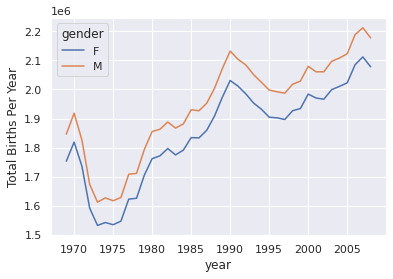

In [ ]:
"""예제: 출생률 데이터"""
births = pd.read_csv("https://raw.githubusercontent.com/jakevdp/data-CDCbirths/master/births.csv")
print(births.head())

#연대 열을 추가하고 연대별 남녀의 출생 수를 살펴보자
births["decade"] = 10 * (births["year"] // 10)
print(births.pivot_table("births", index = "decade", columns = "gender", aggfunc = "sum"))

#시각화
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()   #seaborn 스타일 사용
births.pivot_table("births", index = "year", columns = "gender", aggfunc = "sum").plot()
plt.ylabel("Total Births Per Year")
plt.show()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:30: FutureWarning: The pandas.datetime class is deprecated and will be removed from pandas in a future version. Import from datetime module instead.


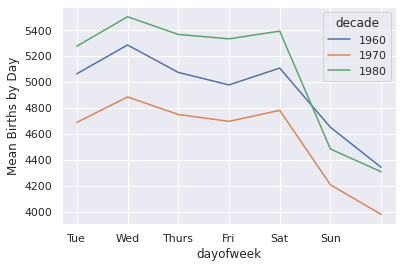

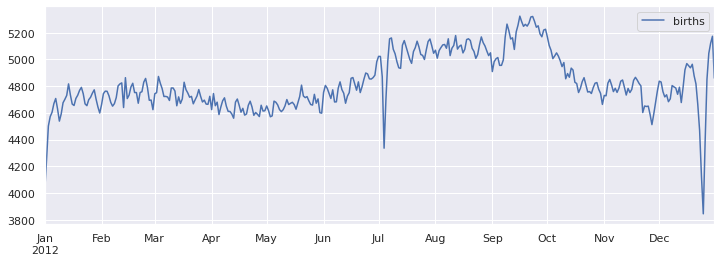

In [ ]:
##  추가 데이터 탐색  ##

####  날짜 오타나 누락된 값으로 인한 이상치 제거. 시그마 클리핑 연산 사용
quartiles = np.percentile(births["births"], [25, 50, 75])
mu = quartiles[1]
sig = 0.74 * (quartiles[2] - quartiles[0])  #표본평균의 추정치

births = births.query("(births > @mu - 5 * @sig) & (births < @mu + 5 * @sig)")

births["day"] = births['day'].astype(int) #"day"열을 정수형으로 설정; 원래는 널 값 때문에 문자열이었음

#년, 월, 일로부터 날짜(datetime) 인덱스 생성
births.index = pd.to_datetime(10000 * births.year + 100 * births.month + births.day, format = '%Y%m%d')
births["dayofweek"] = births.index.dayofweek

#수십 년 동안의 요일별 출생 수를 그래프로 그려보자
import matplotlib.pyplot as plt
import matplotlib as mpl
births.pivot_table("births", index = "dayofweek", columns = "decade", aggfunc = "mean").plot()
plt.gca().set_xticklabels(["Mon", "Tue", "Wed", "Thurs", "Fri", "Sat", "Sun"])
plt.ylabel("Mean Births by Day")


#### 연도 내 일별 평균 출생 수를 알아보자
births_by_date = births.pivot_table("births",
                                    [births.index.month, births.index.day])
births_by_date.head() #월과 일을 인덱스로 가지는 다중 인덱스

#월과 일을 더미 연도 변수와 결합해 연월일의 날짜로 변환해보자(2월 29일을 바르게 처리하도록 윤년을 선택해야함)
births_by_date.index = [pd.datetime(2012, month, day) for (month,day) in births_by_date.index]
births_by_date.head()

#시각화
f, ax = plt.subplots(figsize = (12,4))
births_by_date.plot(ax = ax)


# ================================

# Pandas 문자열 연산 소개

* 실제 지저분한 데이터를 정제하는 절차에 가장 쓸모가 있다

In [ ]:
"""Pandas 문자열 연산 소개"""
import pandas as pd
data = ["peter", "Paul", None, "MARY", "gUIDO"]
names = pd.Series(data)
print(names) ; print("")

names.str.capitalize()    #누락된 값은 건너뛰면서 모든 항목의 첫 글자를 대문자로 변경하는 메서드
#Pandas에서는 문자열에도 벡터화된 연산을 적용하고 누락된 데이터를 올바르게 처리하기 위한 기능을 제공한다

0    peter
1     Paul
2     None
3     MARY
4    gUIDO
dtype: object



0    Peter
1     Paul
2     None
3     Mary
4    Guido
dtype: object

# Pandas 문자열 메서드 목록

https://pandas.pydata.org/pandas-docs/stable/user_guide/text.html

* 아래에서 다루지 않은 내용은 위의 링크로 들어가서 확인해보자

In [ ]:
"""Pandas 문자열 메서드 목록"""
monte = pd.Series(['Graham Chapman', 'John Cleese', 'Terry Gilliam', 
                   'Eric Idle', 'Terry Jones', 'Michael Palin'])

##  파이썬 문자열 메서드와 유사한 메서드  ##
print(monte.str.lower())      #모두 소문자, 문자열 반환
print("")

print(monte.str.len())        #문자열들의 길이, 숫자 반환
print("")

print(monte.str.startswith("T"))  #특정 문자열로 시작하는지 여부, 부울 반환
print("")

print(monte.str.split())          #각 문자열 공백을 기준으로 분할, 리스트 반환
print("")

0    graham chapman
1       john cleese
2     terry gilliam
3         eric idle
4       terry jones
5     michael palin
dtype: object

0    14
1    11
2    13
3     9
4    11
5    13
dtype: int64

0    False
1    False
2     True
3    False
4     True
5    False
dtype: bool

0    [Graham, Chapman]
1       [John, Cleese]
2     [Terry, Gilliam]
3         [Eric, Idle]
4       [Terry, Jones]
5     [Michael, Palin]
dtype: object



In [ ]:
##  정규 표현식을 활용하는 메서드  ##
print(monte.str.extract('([A-Za-z]+)'))  #각 요소의 시작 문자와 붙어 있는 그룹을 요청해 각 요소로부터 이름 부분 추출
print("")

print(monte.str.findall(r'^[^AEIOU].*[^aeiou]$')) #자음으로 시작하고 끝나는 모든 이름 찾기

         0
0   Graham
1     John
2    Terry
3     Eric
4    Terry
5  Michael

0    [Graham Chapman]
1                  []
2     [Terry Gilliam]
3                  []
4       [Terry Jones]
5     [Michael Palin]
dtype: object


In [ ]:
##  기타 메서드  ##

#### 벡터화된 항목의 접근 및 슬라이싱
print(monte.str.slice(0,3))             #슬라이싱
print("")

print(monte.str.split().str.get(-1))    #split이 반환한 배열의 요소에 접근하여 성을 추출(마지막 요소)
print("")

####  지시 변수
full_monte = pd.DataFrame({"info" : ["B|C|D", "B|D", "A|C", "B|D", "B|C", "B|C|D"], "name" : monte})
print(full_monte)   #일종의 코딩된 지시자를 포함한 열을 가지고 있는 경우
print("")

full_monte["info"].str.get_dummies("|")   #get_dummies() 메서드로 이 지시변수를 DataFrame으로 신속하게 나눌 수 있다

0    Gra
1    Joh
2    Ter
3    Eri
4    Ter
5    Mic
dtype: object

0    Chapman
1     Cleese
2    Gilliam
3       Idle
4      Jones
5      Palin
dtype: object

    info            name
0  B|C|D  Graham Chapman
1    B|D     John Cleese
2    A|C   Terry Gilliam
3    B|D       Eric Idle
4    B|C     Terry Jones
5  B|C|D   Michael Palin



,A,B,C,D
0,0,1,1,1
1,0,1,0,1
2,1,0,1,0
3,0,1,0,1
4,0,1,1,0
5,0,1,1,1


# 예제: 조리법 데이터베이스

* OpenRecipe 사이트의 DB는 사용할 수 없다고 한다. 교재를 참고하자

# ================================

# 파이썬에서의 날짜와 시간

* Pandas는 사실 금융 모델링을 위해 개발된 모듈이다. 날짜, 시간, 시간 인덱스를 가진 데이터를 다루는 매우 다양한 도구를 갖고 있다

* 우선 파이썬에서 날짜와 시간을 처리하는 도구에 대해 간단히 알아보자

In [ ]:
"""파이썬에서의 날짜와 시간"""

##  기본 파이썬 날짜와 시간: datetime과 dateutil  ##
from datetime import datetime   #파이썬 내장 모듈 datetime
print(datetime(year = 2015, month = 7, day = 4))

from dateutil import parser     #dateutil 모듈, 다양한 문자열 형태로부터 날짜 해석 가능
date = parser.parse("4th of July, 2015")
print(date)

print(date.strftime("%A"))      #요일을 출력하는 작업
print("")


##  타입이 지정된 시간 배열: NumPy의 datetime64  ##
####  파이썬의 내장 타입인 datetime의 결함을 어느 정도 해결해주지민, datetime과 dateutil이 제공하는 편리한 메서드와 함수가 없는 단점
import numpy as np  
date = np.array("2015-07-04", dtype = np.datetime64)  #np.datetime64 dtype으로 날짜 표현
print(date)

print(date + np.arange(12))       #벡터화 연산 가능

print(np.datetime64("2015-07-04"))    #하루 단위의 datetime
print("")

print(np.datetime64("2015-07-04 12:00"))    #분 단위의 datetime
print("")

print(np.datetime64("2015-07-04 12:59:59.50", "ns"))    #나노초단위의 datetime

2015-07-04 00:00:00
2015-07-04 00:00:00
Saturday

2015-07-04
['2015-07-04' '2015-07-05' '2015-07-06' '2015-07-07' '2015-07-08'
 '2015-07-09' '2015-07-10' '2015-07-11' '2015-07-12' '2015-07-13'
 '2015-07-14' '2015-07-15']
2015-07-04

2015-07-04T12:00

2015-07-04T12:59:59.500000000


In [ ]:
##  Pandas에서의 날짜와 시간: 두 세계의 최선  ##
####  datetime과 dateutil의 사용 편의성과 np.datetime64의 효율적인 저장소와 벡터화된 인터페이스를 결합한 것
import pandas as pd
date = pd.to_datetime("4th of July, 2015")  #다양한 포맷의 문자열 날짜 데이터 해석 가능
print(date) ; print("")
print(date.strftime("%A"))      #포맷 코드를 이용해 요일 출력 가능
print("")

print(date + pd.to_timedelta(np.arange(12), "D"))   #NumPy 스타일의 벡터화 연산도 수행 가능

2015-07-04 00:00:00

Saturday

DatetimeIndex(['2015-07-04', '2015-07-05', '2015-07-06', '2015-07-07',
               '2015-07-08', '2015-07-09', '2015-07-10', '2015-07-11',
               '2015-07-12', '2015-07-13', '2015-07-14', '2015-07-15'],
              dtype='datetime64[ns]', freq=None)


# ================================

# Pandas 시계열 데이터 구조

* Pandas 시계열 도구는 실제로 타임스탬프로 데이터를 인덱싱할 떄 아주 유용하다

* 타임스탬프(Time Stamp) : Timestamp 타입. 관련 인덱스 구조는 DatetimeIndex
* 기간 (Time Period) : Period 타입. 관련 인덱스 구조는 PeriodIndex
* 시간 델타 또는 지속 기간 : Timedelta 타입. 관련 인덱스 구조는 TimedeltaIndex


In [ ]:
"""Pandas 시계열 : 시간으로 인덱싱하기"""
index = pd.DatetimeIndex(["2014-07-04", "2014-08-04", "2015-07-04", "2015-08-04"])  #시간 인덱스
data = pd.Series([0,1,2,3], index = index)    #시간 인덱스를 가진 Series 객체
print(data) ; print("")

print(data["2014-07-04":"2015-07-04"]) ; print("")  #인덱싱 패턴에 사용 가능

print(data["2015"])   #해당 연도를 전달하는 등 특별한 날짜 전용 인덱싱 연산도 있음

2014-07-04    0
2014-08-04    1
2015-07-04    2
2015-08-04    3
dtype: int64

2014-07-04    0
2014-08-04    1
2015-07-04    2
dtype: int64

2015-07-04    2
2015-08-04    3
dtype: int64


In [ ]:
"""Pandas 시계열 데이터 구조"""

# 날짜/시간 객체의 가장 기본은 Timestamp와 DatetimeIndex 객체다
dates = pd.to_datetime([datetime(2015,7,3), "4th of July, 2015", "2015-Jul-6", "07-07-2015", "20150708"])
print(dates) ; print("")

print(dates.to_period("D")) #DatetimeIndex를 to_period 함수에 주기 코드를 추가해 PeriodIndex로 전환
print("")                   #일별 주기를 가리키는 "D" 사용

print(dates - dates[0])     #어떤 날짜에서 다른 날짜를 빼면 TimedaltaIndex가 생성됨
print("")

DatetimeIndex(['2015-07-03', '2015-07-04', '2015-07-06', '2015-07-07',
               '2015-07-08'],
              dtype='datetime64[ns]', freq=None)

PeriodIndex(['2015-07-03', '2015-07-04', '2015-07-06', '2015-07-07',
             '2015-07-08'],
            dtype='period[D]')

TimedeltaIndex(['0 days', '1 days', '3 days', '4 days', '5 days'], dtype='timedelta64[ns]', freq=None)



In [ ]:
##  정규 시퀀스: pd.date_range()  ##
print(pd.date_range("2015-07-03", "2015-07-10"))  #시작일, 종료일, 주기 (주기는 기본적으로 하루)
print("")

print(pd.date_range("2015-07-03", periods = 8))   #시작점과 기간의 수로 지정 가능
print("")

print(pd.date_range("2015-07-03", periods = 8, freq = "H"))   #freq 매개변수를 시간 단위인 "H"로 변경
print("")

print(pd.period_range("2015-07", periods = 8, freq = "M"))    #기간의 정규 시퀀스 생성(월 단위 기간)
print("")

print(pd.timedelta_range(0, periods = 10, freq = "H"))      #타임 델타값의 정규 시퀀스(시간 단위 기간)

DatetimeIndex(['2015-07-03', '2015-07-04', '2015-07-05', '2015-07-06',
               '2015-07-07', '2015-07-08', '2015-07-09', '2015-07-10'],
              dtype='datetime64[ns]', freq='D')

DatetimeIndex(['2015-07-03', '2015-07-04', '2015-07-05', '2015-07-06',
               '2015-07-07', '2015-07-08', '2015-07-09', '2015-07-10'],
              dtype='datetime64[ns]', freq='D')

DatetimeIndex(['2015-07-03 00:00:00', '2015-07-03 01:00:00',
               '2015-07-03 02:00:00', '2015-07-03 03:00:00',
               '2015-07-03 04:00:00', '2015-07-03 05:00:00',
               '2015-07-03 06:00:00', '2015-07-03 07:00:00'],
              dtype='datetime64[ns]', freq='H')

PeriodIndex(['2015-07', '2015-08', '2015-09', '2015-10', '2015-11', '2015-12',
             '2016-01', '2016-02'],
            dtype='period[M]')

TimedeltaIndex(['0 days 00:00:00', '0 days 01:00:00', '0 days 02:00:00',
                '0 days 03:00:00', '0 days 04:00:00', '0 days 05:00:00',
                '0 days 06:00

# 주기와 오프셋

* 주로 사용하는 주기 코드 : 교재 p228 참고

# 리샘플링, 시프팅, 윈도잉

* 구글 코랩에서 DataReader(data_source = "yahoo")가 실행되지 않는 문제

  - VS Code에서 실행 후 데이터 프레임 파일로 저장하여 csv 파일로 불러왔음

* resample, asfreq, shift, tshift, rolling

                 High        Low       Open      Close      Volume  Adj Close
Date                                                                         
2004-08-19  51.835709  47.800831  49.813290  49.982655  44871361.0  49.982655
2004-08-20  54.336334  50.062355  50.316402  53.952770  22942874.0  53.952770
2004-08-23  56.528118  54.321388  55.168217  54.495735  18342897.0  54.495735
2004-08-24  55.591629  51.591621  55.412300  52.239197  15319808.0  52.239197
2004-08-25  53.798351  51.746044  52.284027  52.802086   9232276.0  52.802086


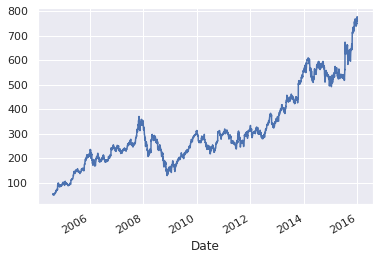

In [ ]:
"""리샘플링, 시프팅, 윈도잉"""
import pandas as pd
import numpy as np
goog = pd.read_csv("Google.csv")
goog.index = pd.DatetimeIndex(goog["Date"])
goog = goog.iloc[:,1:7]
print(goog.head())        #VS Code에서 파일 다운로드 후 데이터 불러왔음

goog = goog["Close"]    #종가 가격만 확인

import matplotlib.pyplot as plt
import seaborn as sns
sns.set()
goog.plot()
plt.show()

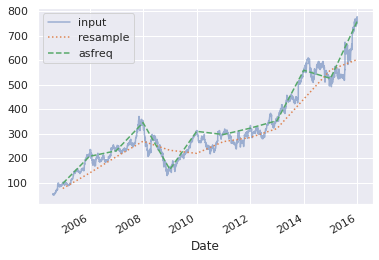

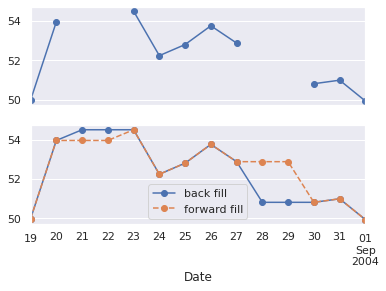

In [ ]:
##  리샘플링 및 주기 변경 ##
####  Resampling : 시계열 데이터를 더 높거나 낮은 주기로 표본을 다시 추출하는 것

##  resample()은 기본적으로 데이터를 집계하지만 asfreq()는 기본적으로 데이터를 선택한다
goog.plot(alpha = 0.5, style = "-")
goog.resample("BA").mean().plot(style = ":")    #BA : 영업일 기준 연말, mean()으로 평균 집계
goog.asfreq("BA").plot(style = "--")
plt.legend(["input", "resample", "asfreq"], loc = "upper left")
plt.show()

## resample : 전년도 평균을 보여줌
## asfreq : 연말 주가를 보여줌

fig, ax = plt.subplots(2, sharex = True)
data = goog.iloc[:10]

data.asfreq("D").plot(ax = ax[0], marker = "o")

data.asfreq("D", method = "bfill").plot(ax = ax[1], style = "-o")   #역방향 채우기
data.asfreq("D", method = "ffill").plot(ax = ax[1], style = "--o")  #순방향 채우기
ax[1].legend(["back fill", "forward fill"])
plt.show()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:13: FutureWarning: tshift is deprecated and will be removed in a future version. Please use shift instead.
  del sys.path[0]


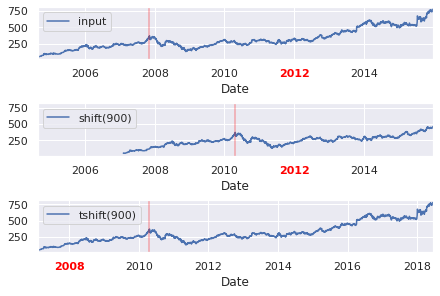

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:38: FutureWarning: tshift is deprecated and will be removed in a future version. Please use shift instead.


Text(0, 0.5, '% Return on Investment')

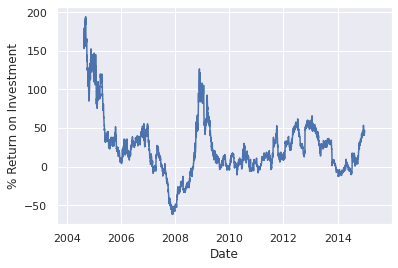

In [ ]:
##  시간 이동(Time-shift)  ##
####  shift는 데이터를 이동시키는 반면, tshift는 인덱스를 이동시킨다
####  두 경우 모두 이동은 주기의 배수로 지정한다

#900일 단위로 시간 이동을 수행하여 보자
fig, ax = plt.subplots(3, sharey = True, constrained_layout = True) #constrained_layout 매개변수로 간격 자동 조정

#데이터에 주기를 적용
goog = goog.asfreq("D", method = "pad")

goog.plot(ax = ax[0])
goog.shift(900).plot(ax = ax[1])
goog.tshift(900).plot(ax = ax[2])


#범례와 주석
local_max = pd.to_datetime("2007-11-05")
offset = pd.Timedelta(900, "D")

ax[0].legend(["input"], loc = 2)
ax[0].get_xticklabels()[4].set(weight = "heavy", color = "red")
ax[0].axvline(local_max, alpha = 0.3, color = "red")

ax[1].legend(["shift(900)"], loc = 2)
ax[1].get_xticklabels()[4].set(weight = "heavy", color = "red")
ax[1].axvline(local_max + offset, alpha = 0.3, color = "red")

ax[2].legend(["tshift(900)"], loc = 2)
ax[2].get_xticklabels()[1].set(weight = "heavy", color = "red")
ax[2].axvline(local_max + offset, alpha = 0.3, color = "red")
plt.show()


## shift(900)는 데이터를 900일 이동시켜서 그래프 끝의 일부를 밀어내고 그 반대쪽을 NA값으로 둠
## thisft(900)은 인덱스값을 900일만큼 이동시킨다

#이동된 값을 이용하여 데이터세트의 기간동안 구글 주가의 연간 투자 대비 효과를 계산하여 보자
ROI = 100 * (goog.tshift(-365) / goog - 1)
ROI.plot()
plt.ylabel("% Return on Investment")

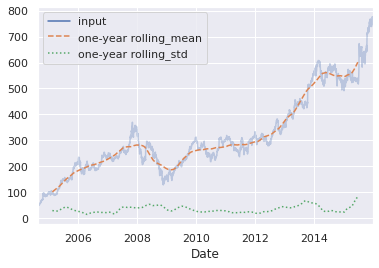

In [ ]:
##  롤링 윈도우(Rolling Windows)  ##
####  Series와 DataFrame 객체의 rolling() 속성을 통해 수행할 수 있다
####  Groupby 연산에서 본 것과 유사한 뷰를 반환한다

#구글 주가의 1년 중심 롤링 평균과 표준 편차를 구해보자
rolling = goog.rolling(365, center = True)
 
data = pd.DataFrame({"input" : goog,
                     "one-year rolling_mean" : rolling.mean(),
                     "one-year rolling_std" : rolling.std()})
ax = data.plot(style = ["-", "--", ":"])
ax.lines[0].set_alpha(0.3)
plt.show()

#groupby 연산과 마찬가지로 사용자 정의 롤링계산을 위해 aggregate()와 apply() 메서드를 사용할 수 있다

# 추가 학습 자료

* 더 자세한 내용은 Pandas 온라인 문서의 시계열/날짜(Time Series/Date) 절을 참고하자

https://pandas.pydata.org/docs/user_guide/timeseries.html


#예제: 시애틀 자전거 수 시각화

In [ ]:
"""예제 : 시애틀 자전거 수 시각화"""
import pandas as pd
data = pd.read_csv("Fremont_Bridge_Bicycle_Counter.csv", index_col = "Date", parse_dates = True)
print(data.head())

                     Fremont Bridge Total  Fremont Bridge East Sidewalk  \
Date                                                                      
2019-11-01 00:00:00                  12.0                           7.0   
2019-11-01 01:00:00                   7.0                           0.0   
2019-11-01 02:00:00                   1.0                           0.0   
2019-11-01 03:00:00                   6.0                           6.0   
2019-11-01 04:00:00                   6.0                           5.0   

                     Fremont Bridge West Sidewalk  
Date                                               
2019-11-01 00:00:00                           5.0  
2019-11-01 01:00:00                           7.0  
2019-11-01 02:00:00                           1.0  
2019-11-01 03:00:00                           0.0  
2019-11-01 04:00:00                           1.0  


In [ ]:
data.columns = ["Total", "East", "West"]
data.dropna().describe()

,Total,East,West
count,150878.000000,150878.000000,150878.000000
mean,109.454539,49.594885,59.859655
std,139.444543,64.153845,86.599269
min,0.000000,0.000000,0.000000
25%,14.000000,6.000000,7.000000
50%,59.000000,27.000000,30.000000
75%,144.000000,67.000000,74.000000
max,1097.000000,698.000000,850.000000


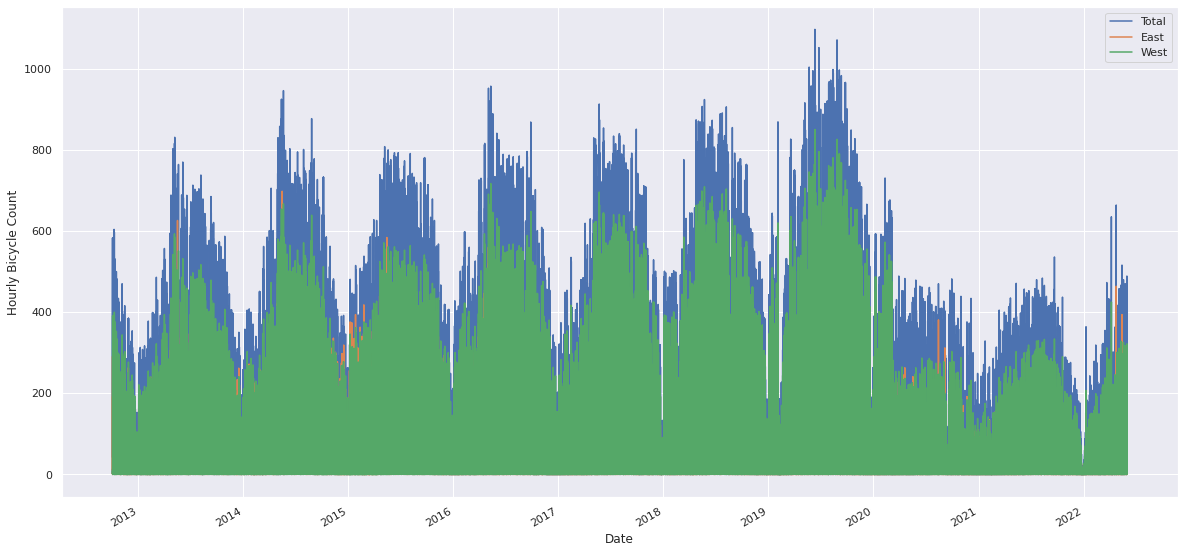

In [ ]:
##  데이터 시각화하기
import matplotlib.pyplot as plt
import seaborn as sns ; sns.set()
data.plot(figsize = (20,10))
plt.ylabel("Hourly Bicycle Count")
plt.show()        #원시 데이터 시각화

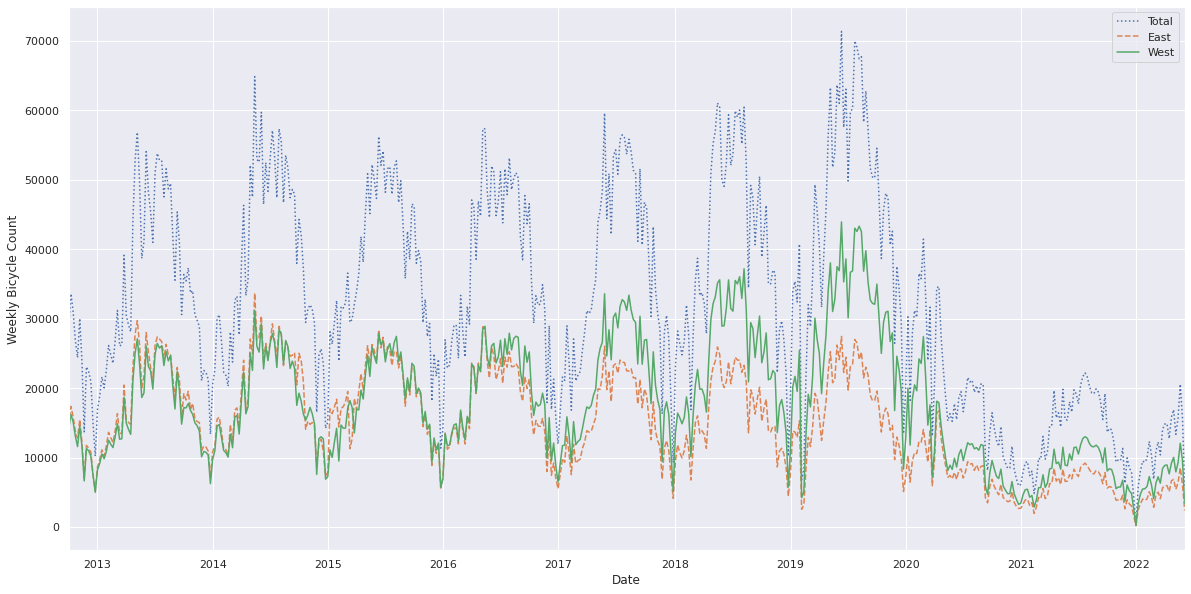

In [ ]:
##  주 단위로 리샘플링 해보자
weekly = data.resample("W").sum()
weekly.plot(style = [":", "--", "-"], figsize = (20,10))
plt.ylabel("Weekly Bicycle Count")
plt.show()

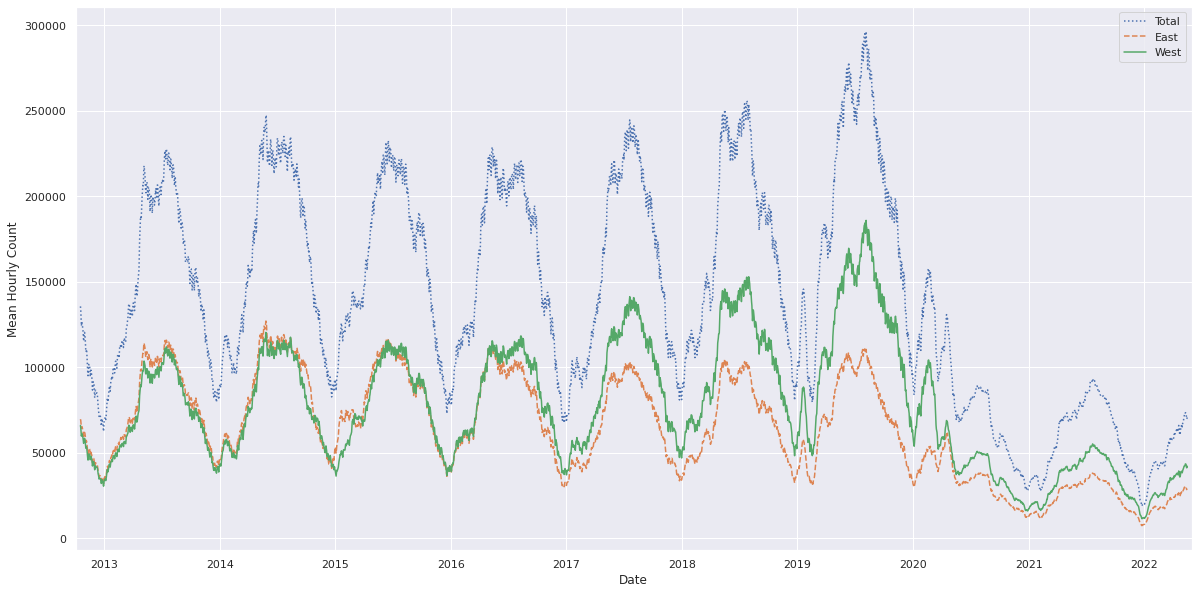

In [ ]:
##  30일 롤링평균을 구하여 보자
daily = data.resample("D").sum()
daily.rolling(30, center = True).sum().plot(style = [":", "--", "-"], figsize = (20,10))
plt.ylabel("Mean Hourly Count")
plt.show()

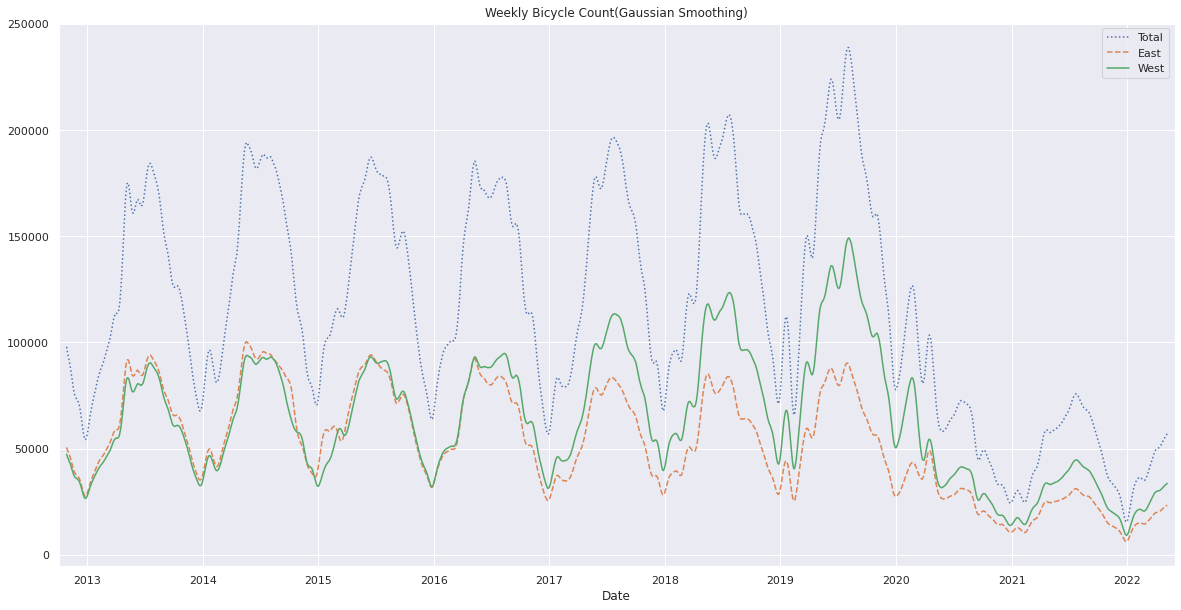

In [ ]:
##  가우스 윈도우(Gaussian Window) 같은 윈도우 함수를 사용해 롤링 평균을 부드럽게 표현하여보자
daily.rolling(50, center = True, win_type = "gaussian").sum(std = 10).plot(style = [":", "--", "-"], figsize = (20,10))
    # 윈도우 폭 50일, 가우스 폭 10일로 지정
plt.title("Weekly Bicycle Count(Gaussian Smoothing)")
plt.show()

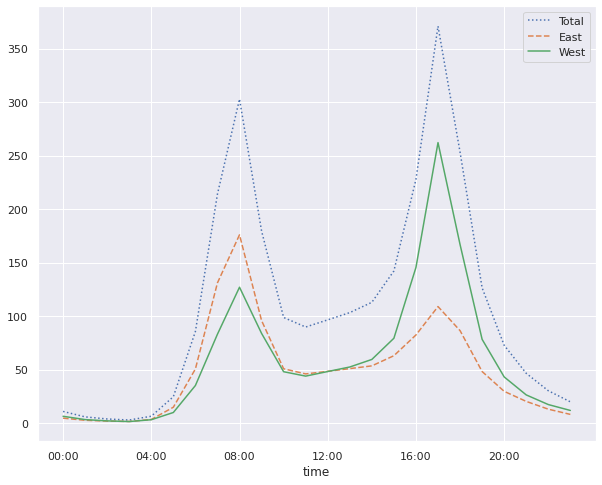

In [ ]:
##  데이터 파헤쳐 보기  ##

##  하루 시간대별 평균 통행량을 확인해보자
import numpy as np
by_time = data.groupby(data.index.time).mean()
hourly_ticks = 4 * 60 * 60 * np.arange(6)
by_time.plot(xticks = hourly_ticks, style = [":", "--", "-"], figsize = (10,8))
    ##  8시와 17시 무렵에 정점을 이루는 강한 양봉 분포를 보임
    ##  East의 교통량이 아침에 정점을 이루고 West의 교통량이 저녁에 정점을 찍는다는 사실 파악

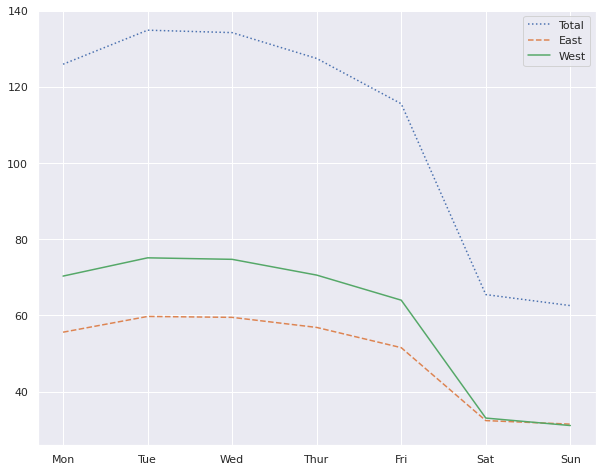

In [ ]:
##  요일별 통행량 확인
by_weekday = data.groupby(data.index.dayofweek).mean()
by_weekday.index = ["Mon", "Tue", "Wed", "Thur", "Fri", "Sat", "Sun"]
by_weekday.plot(style = [":", "--", "-"], figsize = (10,8))
    ##  평일의 평균 통행량이 주말 평균 통행량보다 훨씬 많음을 알 수 있다

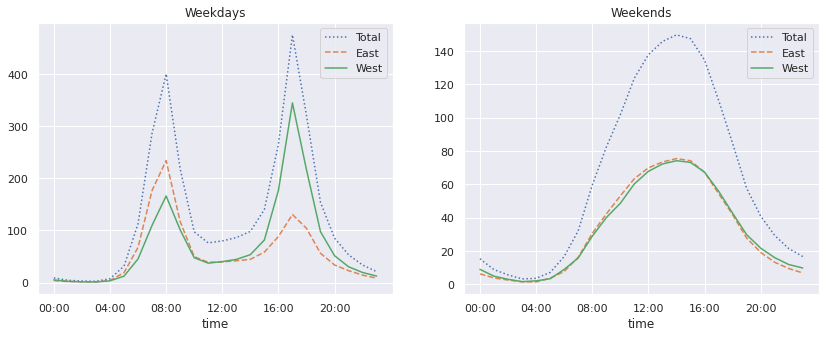

In [ ]:
##  주중과 주말의 시간대별 추이를 살펴보자
import numpy as np
weekend = np.where(data.index.weekday < 5, "Weekday", "Weekend")
by_time = data.groupby([weekend, data.index.time]).mean()

import matplotlib.pyplot as plt
fig, ax = plt.subplots(1,2, figsize = (14,5))
by_time.loc["Weekday"].plot(ax = ax[0], title = "Weekdays",
                           xticks = hourly_ticks, style = [":", "--", "-"])
by_time.loc["Weekend"].plot(ax = ax[1], title = "Weekends",
                           xticks = hourly_ticks, style = [":", "--", "-"])
plt.show()

#주중에는 양봉 형태의 출퇴근 패턴을 보임
#주말에는 단봉 형태의 패턴

# ================================

# query()와 eval()의 등장 배경: 복합 표현식

복합 표현식의 중간 배열을 할당하지 않고도 요소별로 계산하기 위함

-> 배열에서는 Numexpr 라이브러리를 사용하며, Pandas의 query()/eval() 도구도 개념적으로 유사하며 Numexpr 패키지에 의존한다

# 효율적인 연산을 위한 pandas.eval()

In [10]:
"""효율적인 연산을 위한 pandas.eval()"""
import pandas as pd
import numpy as np
nrows, ncols = 100000, 100
rng = np.random.RandomState(42)
df1, df2, df3, df4 = (pd.DataFrame(rng.rand(nrows, ncols)) for i in range(4))

%timeit df1+ df2+ df3+ df4                  #전형적인 Pandas 접근방식 사용

%timeit pd.eval("df1 + df2 + df3 + df4")    #표현식을 문자열로 구성, pd.eval() 사용
                                            #더 빠르고 메모리도 적게 사용한다

10 loops, best of 5: 62.3 ms per loop
10 loops, best of 5: 47.9 ms per loop


In [ ]:
##  pd.eval()이 지원하는 연산  ##

#모든 산술 연산자
#비교 연산자 (<, >, <=, >=, ==, !=)
#비트 단위 연산자 (&, |)
#부울 표현식에서 and와 or

# 열 단위의 연산을 위한 DataFrame.eval()

In [27]:
"""열 단위의 연산을 위한 DataFrame.eval()"""
df = pd.DataFrame(rng.rand(1000,3), columns = ["A", "B", "C"])    #예제 데이터 생성

result1 = pd.eval("df.A + df.B / df.C - 1")
result2 = df["A"] + df["B"] / df["C"] - 1
np.allclose(result1, result2)     #배열이 동일한지 확인

result3 = df.eval("A + B/C - 1")      #DataFrame.eval() 메서드를 사용하면 열을 사용하는 표현식을 훨씬 간결하게 표현 가능
np.allclose(result2, result3)

True

In [28]:
##  DataFrame.eval()에서의 할당  ##
print(df.head())

df.eval("D = (A + B) / C", inplace = True)    #다른 열로부터 계산된 값을 새로운 열을 생성하고 할당 가능
print(df.head())

          A         B         C
0  0.409575  0.395501  0.285544
1  0.115963  0.318804  0.946099
2  0.364817  0.411111  0.368325
3  0.206158  0.833919  0.605509
4  0.380256  0.472529  0.716643
          A         B         C         D
0  0.409575  0.395501  0.285544  2.819450
1  0.115963  0.318804  0.946099  0.459536
2  0.364817  0.411111  0.368325  2.106641
3  0.206158  0.833919  0.605509  1.717689
4  0.380256  0.472529  0.716643  1.189971


In [33]:
##  DataFrame.eval()의 지역변수  ##
column_mean = df.mean(axis = 1)
column_mean

result1 = df["A"] + column_mean
result2 = df.eval("A + @column_mean")   # @기호는 열 이름이 아닌 변수 이름을 표시한다. DataFrame.eval() 메서드에서만 지원
np.allclose(result1, result2)

True

# DataFrame.query()의 메서드

In [40]:
"""DataFrame.query()의 메서드"""

result1 = df[(df.A < 0.5) & (df.B < 0.5)]
result2 = pd.eval("df[(df.A < 0.5) & (df.B < 0.5)]")    #이 구문을 DataFrame.eval() 메서드로 사용할 수는 없다!
print(np.allclose(result1, result2))

result3 = df.query("A < 0.5 and B < 0.5")   #DataFrame.query() 메서드로 필터링 연산 가능
print(np.allclose(result1, result3))

#지역변수 사용을 위한 @
Cmean = df["C"].mean(axis = 0)
result1 = df[(df.A < Cmean) & (df.B < Cmean)]
result2 = df.query("A < @Cmean and B < @Cmean")   #변수 사용을 위한 @
print(np.allclose(result1, result2))

True
True
True


# 성능: 이 함수를 사용해야 하는 경우

계산 시간과 메모리 사용을 고려하자